# Introduction

This project is divided into two parts: Part 1 focuses on Exploratory Data Analysis (EDA), and Part 2 involves Sales Quantity Prediction using Machine Learning. The goal is to analyze and predict sales performance across regions, sales channels, customer types, and product categories, while considering factors like discount rates, sales amounts, and profit margins. The dataset used for this analysis was sourced from Kaggle and includes variables such as product ID, sale date, region, sales amount, quantity sold, customer type, payment method, and discount rate.
Part 1: Exploratory Data Analysis (EDA)
In Part 1, historical sales data is analyzed to uncover valuable insights into trends, regional sales performance, product category dynamics, and the impact of various discount rates. The analysis also compares the behavior of new vs. returning customers and evaluates how retail and online sales channels perform.
Key business questions addressed include:

What were the total sales for each month, and how did they fluctuate over the year?
How did product sales perform across different regions, and which regions performed best?
Which product categories had the highest and lowest sales across the year?
How did discounts impact total sales, and which discount ranges were most effective?
What was the performance of new vs. returning customers, and how did their buying behavior differ?
Which sales channel (online vs. retail) had higher sales, and how did regions differ in channel preference?
What were the highest and lowest profit margins across regions and product categories?
What was the sales performance of specific products (e.g., Food, Furniture, Clothing) in each region?
How did seasonal factors like the holiday season (Nov-Dec) affect overall sales and product performance?
What should be the focus for future growth based on customer behavior and regional trends?

These questions provide insights into how factors like regional preferences, customer loyalty, and discount strategies influence sales performance. By answering these questions, businesses can optimize their strategies—identifying the most profitable regions, the best discount levels, and customer behaviors to target.
The analysis highlights the 22% discount as the most effective for driving sales, while also shedding light on key trends, such as the preference of returning customers for Furniture and the dominance of retail sales in certain regions. These findings offer actionable recommendations to improve sales strategies and customer targeting.
Part 2: Sales Quantity Prediction using Machine Learning
Part 2 of the project shifts to predictive analysis. Using machine learning models, including Linear Regression, Polynomial Regression, and Random Forest, future sales quantities are forecasted. The Random Forest model emerged as the most accurate, demonstrating its suitability for predicting sales performance in future periods. These predictions will help businesses plan for demand, optimize inventory, and tailor marketing campaigns to expected sales trends.

# PART 1 : Sales Exploratory Data Analysis (EDA)

In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [328]:
data = pd.read_csv("sales_data.csv") 
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [330]:
data.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [331]:
data.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [332]:
data.duplicated().sum() 

0

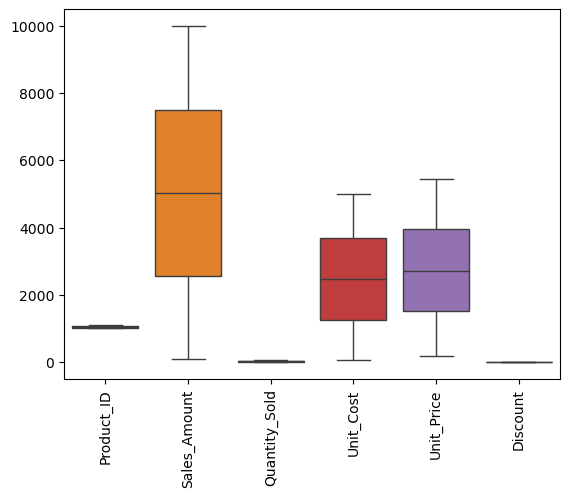

In [333]:
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64'])) 
plt.xticks(rotation=90)
plt.show()

The dataset has no missing values, duplicates, or outliers and seems to be clean to start the analysis

### Sales Over The year 

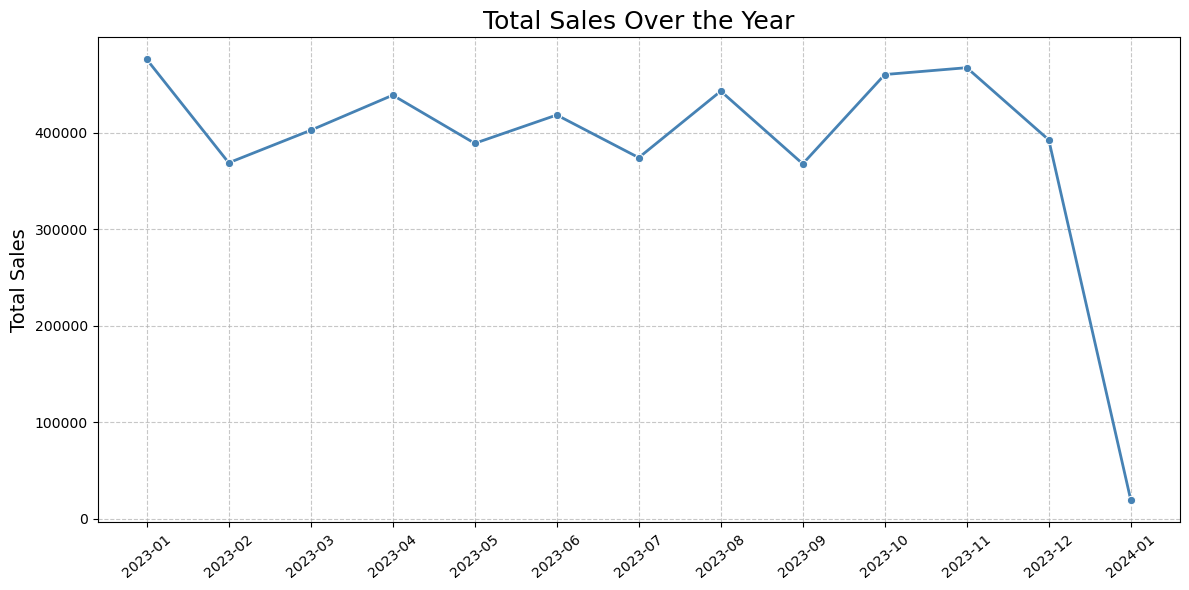

In [334]:
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'])
data['Year_Month'] = data['Sale_Date'].dt.to_period('M')
monthly_sales = data.groupby('Year_Month')['Sales_Amount'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, color="steelblue", linestyle='-', linewidth=2, marker='o', markersize=6)
plt.title('Total Sales Over the Year', fontsize=18,)
plt.xlabel('')
plt.ylabel('Total Sales', fontsize=14,  color='black')
plt.xticks(rotation=40)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Sales were fairly consistent throughout the year across all regions but took a dramatic downturn in January 2024

In [335]:
Month_data = data[data['Sale_Date'].dt.strftime('%Y-%m').isin(['2023-11', '2023-12', '2024-01'])]
sales_month = pd.DataFrame(M_DATA.groupby(M_DATA['Sale_Date'].dt.to_period('M'))['Sales_Amount'].sum())
sales_month


,Sales_Amount
Sale_Date,
2023-11,467482.90
2023-12,392643.58
2024-01,19328.01


In November 2023, total sales amounted to 467,482.90. In December 2023, sales decreased to 392,643.58, a decline of approximately 16%.
In January 2024, sales dropped drastically to 19,328.01, marking a significant decrease of about 95% compared to December.

#### Sales over the year by region

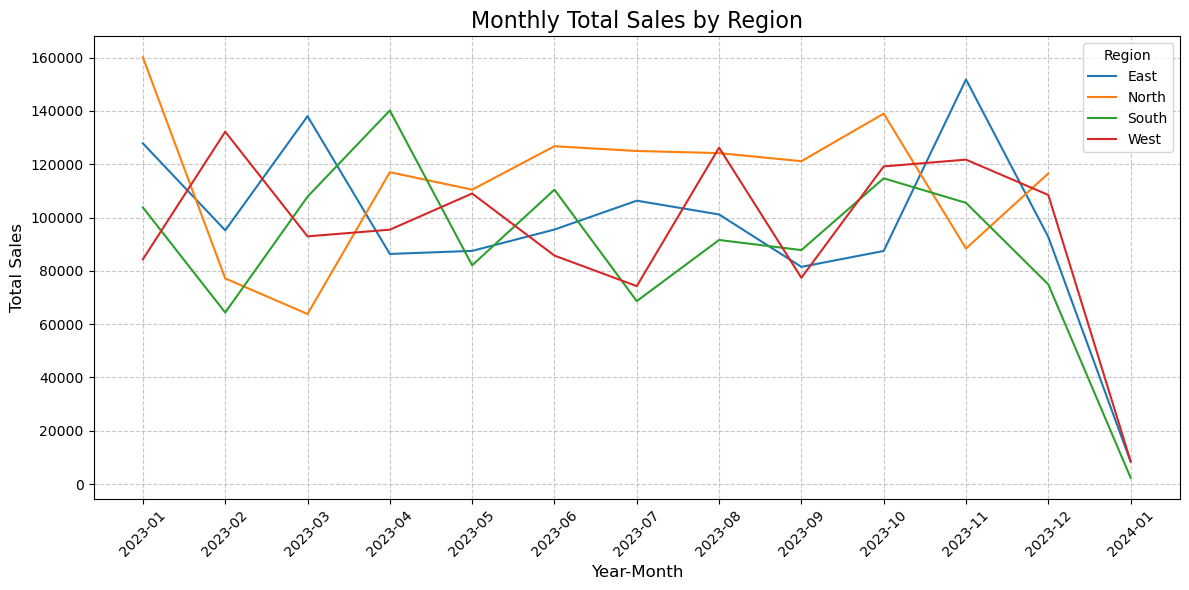

In [336]:
monthly_sales_by_region = data.groupby([data['Sale_Date'].dt.to_period('M'), 'Region'])['Sales_Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))

regions = monthly_sales_by_region['Region'].unique()

for region in regions:
    region_data = monthly_sales_by_region[monthly_sales_by_region['Region'] == region]
    sns.lineplot(x=region_data['Sale_Date'].astype(str), y=region_data['Sales_Amount'], label=region)

plt.title('Monthly Total Sales by Region', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [337]:
Month_data = data[data['Sale_Date'].dt.strftime('%Y-%m').isin(['2023-11', '2023-12', '2024-01'])]
sales_month_region = Month_data.groupby([Month_data['Sale_Date'].dt.to_period('M'), 'Region'])['Sales_Amount'].sum().reset_index()
sales_month_region_df = pd.DataFrame(sales_month_region)
sales_month_region_df


,Sale_Date,Region,Sales_Amount
0,2023-11,East,151828.16
1,2023-11,North,88390.81
2,2023-11,South,105521.68
3,2023-11,West,121742.25
4,2023-12,East,92710.52
5,2023-12,North,116555.34
6,2023-12,South,74897.87
7,2023-12,West,108479.85
8,2024-01,East,8377.57
9,2024-01,South,2370.72


Sales were consistently between 60,000 and 140,000 across all regions. The North had the highest peak in January 2023 (160,000), while the East peaked in November 2023 (155,000).
The South experienced a notable decline in February 2023, and the North saw a sharp drop in March 2023. These were the most significant declines of the year, except for the sharp decrease from December 2023 to January 2024.
In January 2024, no sales were recorded for the North, which is why it showed no decline on the graph

#### Most Sold Product 

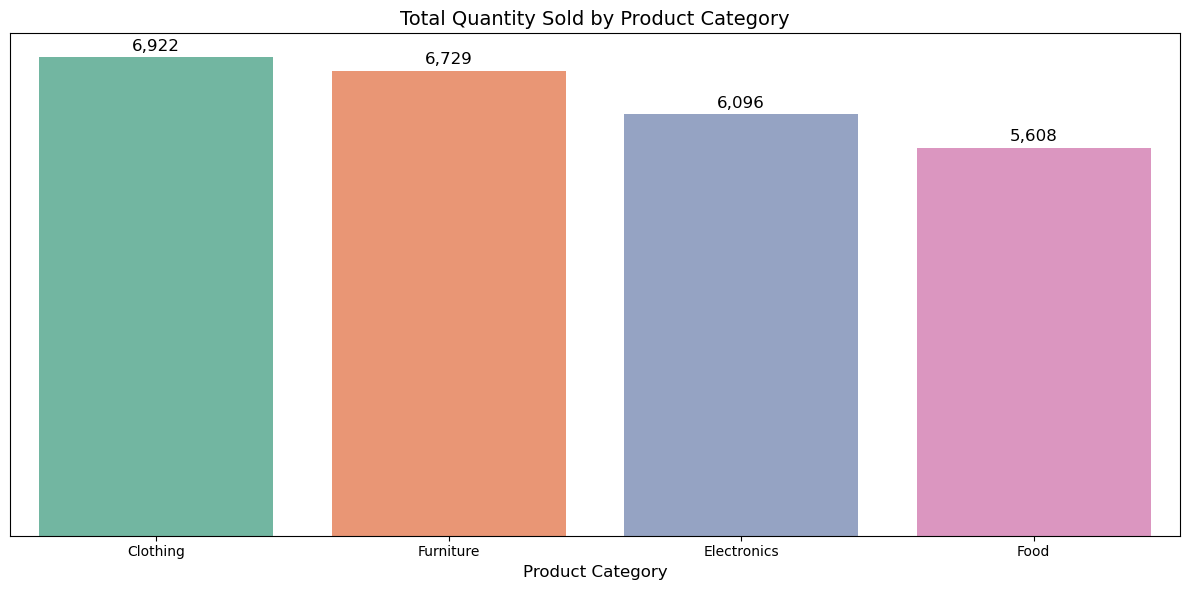

In [338]:
quantity_by_category = data.groupby("Product_Category")["Quantity_Sold"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))  
ax = sns.barplot(x=quantity_by_category.index, y=quantity_by_category.values, hue=quantity_by_category.index, palette='Set2')

plt.title('Total Quantity Sold by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')
plt.yticks([]) 
plt.tight_layout()
plt.show()

Clothing is the top-selling product category, with 6,922 units sold, closely followed by Furniture with 6,729 units. Electronics comes in third with 6,096 units sold, while Food ranks last with 5,608 units sold.

### Product Performance Across Regions and Months 

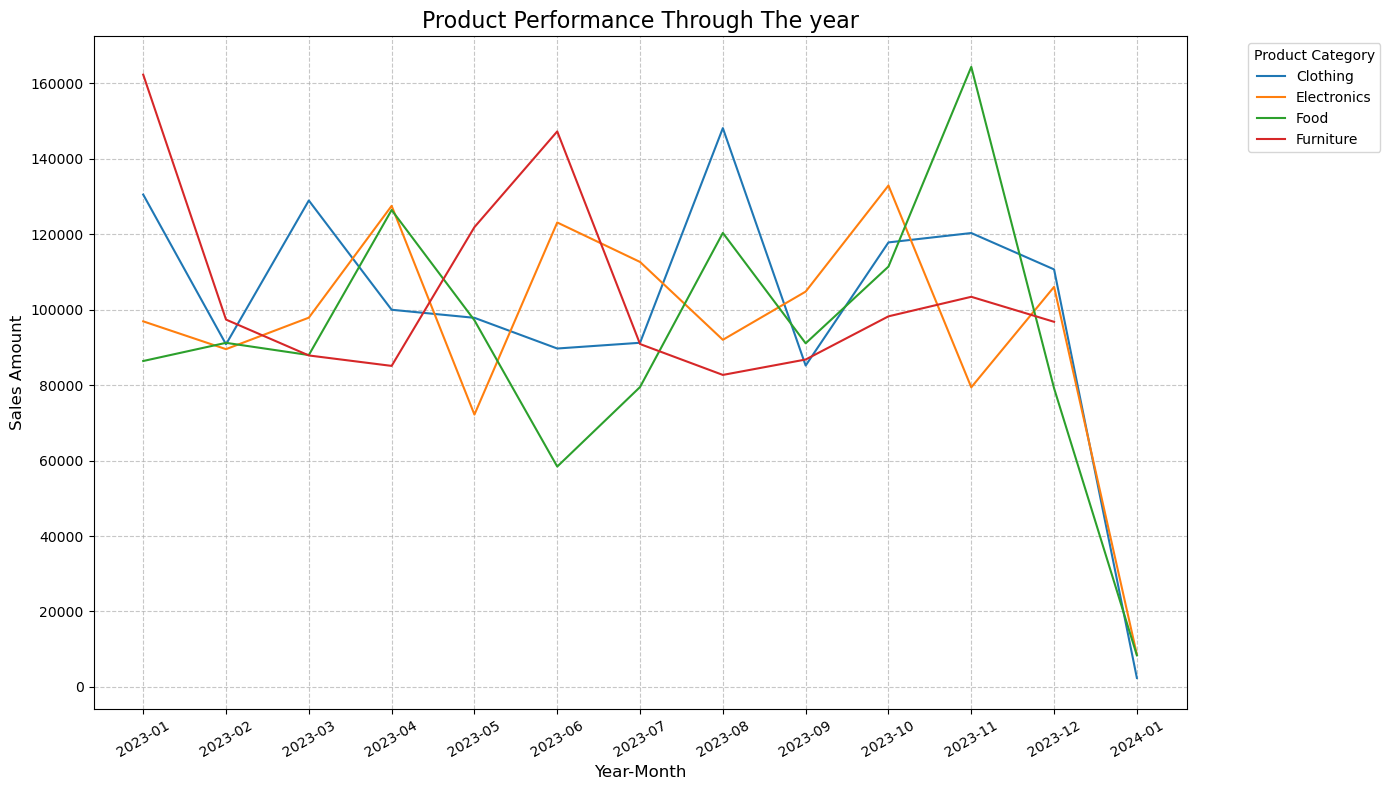

In [339]:
product_monthly_sales = data.groupby(['Product_Category', 'Year_Month'])['Sales_Amount'].sum().unstack()

plt.figure(figsize=(14, 8))

for product in product_monthly_sales.index:
    plt.plot(product_monthly_sales.columns.astype(str), product_monthly_sales.loc[product], label=product)

plt.title('Product Performance Through The year', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(rotation=30) 
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

All products dropped in January 2024, except for furniture. During the year, furniture had peaks in January 2023 and June 2023, but overall sales ranged between 80,000 and 100,000. Clothing is the most sold product, and although the highest peak was in August 2023, throughout the year, sales fluctuated a bit but remained between 90,000 and 120,000. Electronics sales were also consistently between 80,000 and 100,000, with a small drop in May 2023 and a slight peak in October 2023. Food experienced a drop in June 2023 and a peak in November 2023, but overall sales remained steady.

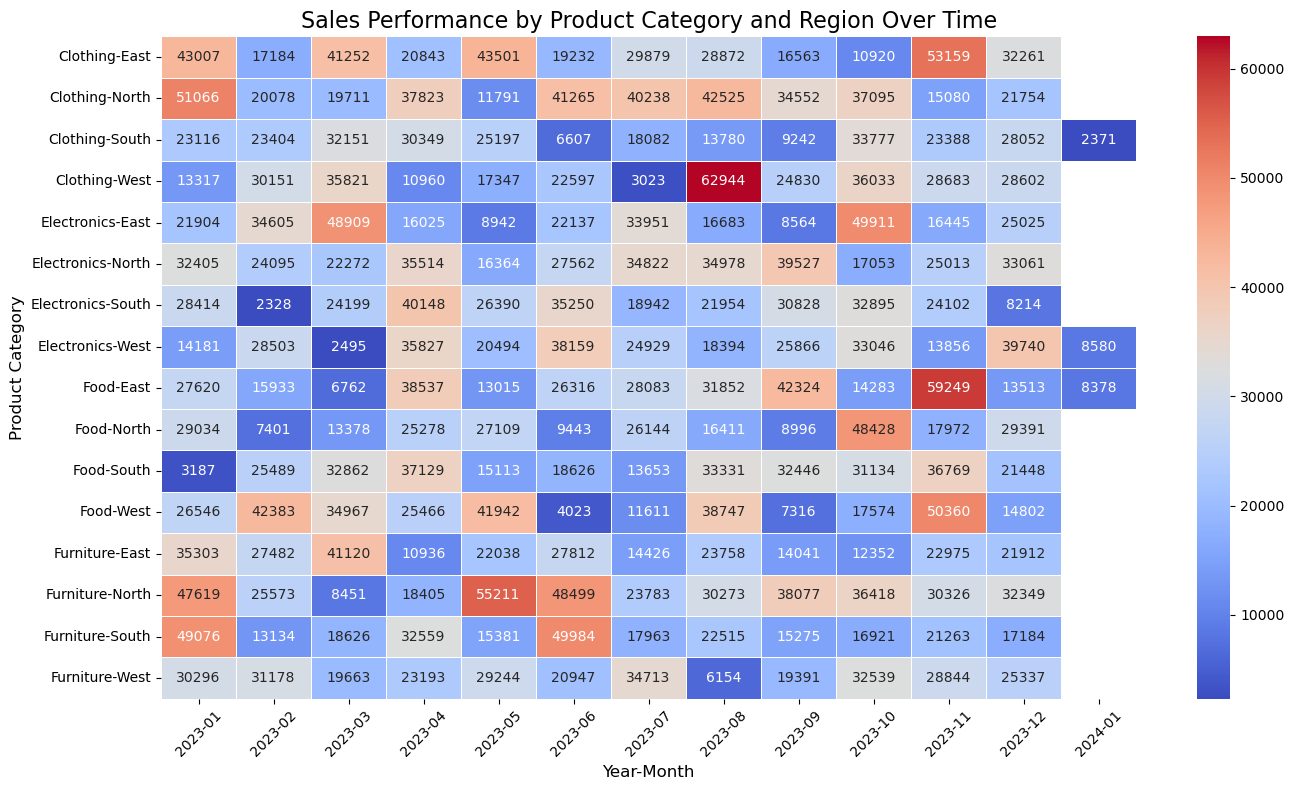

In [340]:
product_region_monthly_sales = data.groupby(['Product_Category', 'Region', 'Year_Month'])['Sales_Amount'].sum().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(product_region_monthly_sales, annot=True, cmap='coolwarm', fmt='.0f', cbar=True, linewidths=0.5)
plt.title('Sales Performance by Product Category and Region Over Time', fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Sales_Performance_by_Product_Category_and_Region_Over_Time.png')
plt.show()

Clothing:
Sales fluctuate significantly across all regions, with high peaks at the beginning and end of the year.
The East region peaked at 53,158.57 in November, while the North region had consistent performance, reaching 42,524.61 in August.
The West region peaked at 62,944 in August, but experienced fluctuations throughout the year.
Electronics:
East showed strong sales, peaking at 48,909.38 in March and 49,910.53 in October.
West had big dips in March, with sales falling to 2,494.74, but recovered well in October, reaching 33,046.14.
Food:
East saw strong food sales in September at 42,323.86, and November at 59,249.28.
South showed consistent growth in March at 32,861.78, and October at 31,134.13.
Furniture:
The East region saw drops in sales from June to September, with the lowest in September at 14,040.76, but recovered in the last quarter with 22,974.83 in November.
The North region had consistent performance, especially mid-year, reaching 55,211.09 in May.
Regional Insights
East: Generally strong across all products, with notable seasonal peaks in November (Food at 59,249.28 and Clothing at 53,158.57) and October (Electronics at 49,910.53).
North: Stable sales, especially for Clothing and Furniture throughout the year. Clothing peaked at 42,524.61 in August, and Furniture at 55,211.09 in May.
South: Higher fluctuations, with October showing stronger sales for most products. Clothing reached 25,197.46 in May, while Electronics had a drop in February to 2,328.25.
West: Significant drops in March, with Clothing at 13,317.04 and Electronics at 2,494.74, but strong recovery in October with Clothing at 36,032.93 and Electronics at 33,046.14.

In [341]:
nan_values = product_region_monthly_sales[['2023-11', '2023-12', '2024-01']].isna()
print(nan_values)


Year_Month               2023-11  2023-12  2024-01
Product_Category Region                           
Clothing         East      False    False     True
                 North     False    False     True
                 South     False    False    False
                 West      False    False     True
Electronics      East      False    False     True
                 North     False    False     True
                 South     False    False     True
                 West      False    False    False
Food             East      False    False    False
                 North     False    False     True
                 South     False    False     True
                 West      False    False     True
Furniture        East      False    False     True
                 North     False    False     True
                 South     False    False     True
                 West      False    False     True


This explains the sales drop in January 2024. The data for January 2024 is not fully complete, which could mean that there were no sales during this month, or the sales data for January 2024 was not updated.
Clothing: Sales are registered only in the South region for the month of 2024-01.
Electronics: Sales are registered only in the West region for the month of 2024-01.
Food: Sales are registered only in the East region for the month of 2023-11.
Furniture: No sales are registered in any region for the month of 2024-01

### Region Performance 

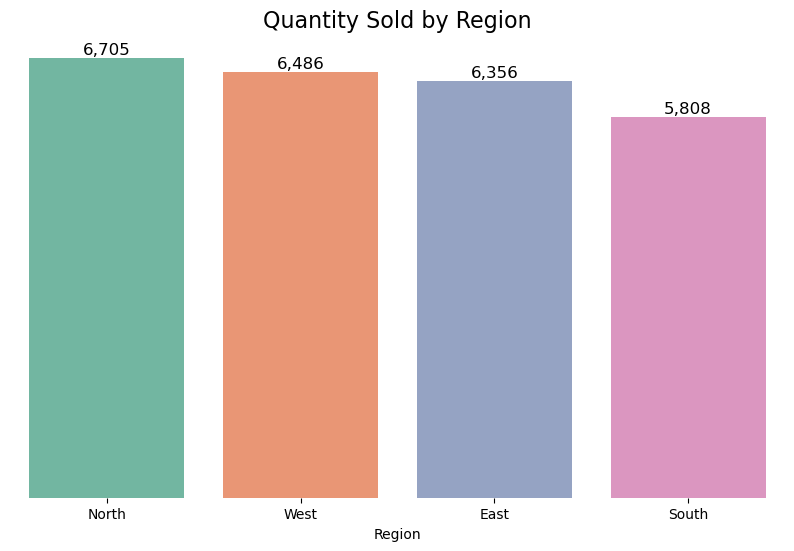

In [342]:
quatity_sold_region = data.groupby("Region")["Quantity_Sold"].sum().sort_values(ascending=False) 

plt.figure(figsize=(10,6))
ax = sns.barplot(x=quatity_sold_region.index, y=quatity_sold_region.values, palette="Set2", hue=quatity_sold_region.index)

for i in range(len(quatity_sold_region)):
    ax.text(i, quatity_sold_region.iloc[i] + 50, f'{quatity_sold_region.iloc[i]:,.0f}', ha='center', fontsize=12, color='black')
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title('Quantity Sold by Region', fontsize=16)
ax2.set_yticklabels([])
plt.xticks(rotation=0)
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels([])
plt.show()

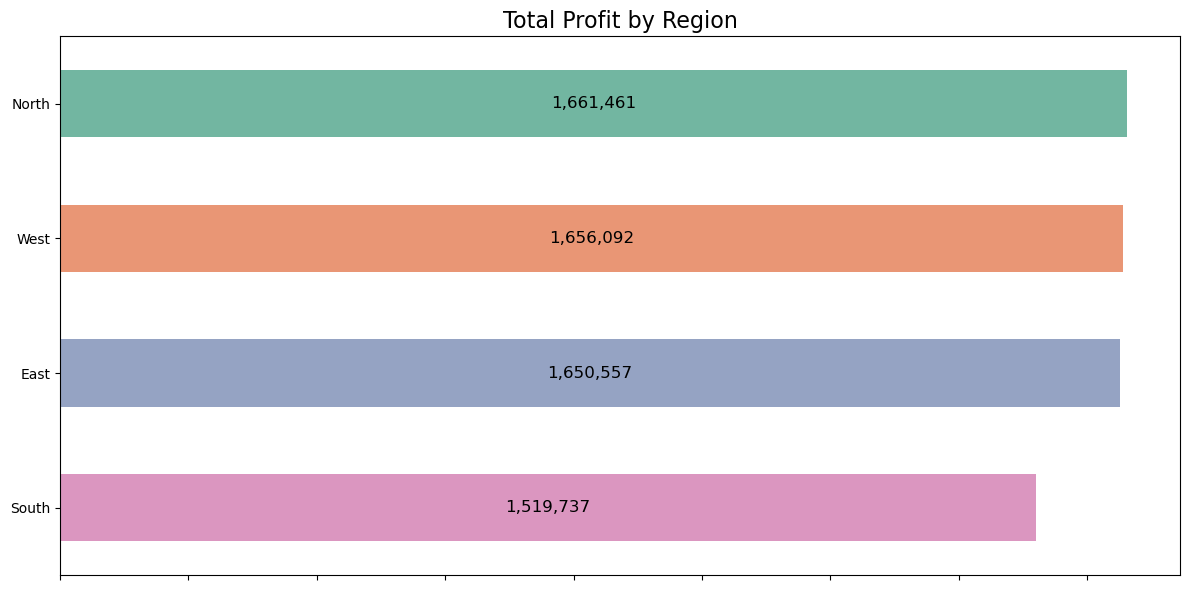

In [343]:
data['Total_Profit'] = (data['Unit_Price'] - data['Unit_Cost']) * data['Quantity_Sold']
data['Profit_Margin'] = (data['Total_Profit'] / data['Sales_Amount']) * 100

total_profit_region = data.groupby('Region')['Total_Profit'].sum()
total_profit_region = total_profit_region.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=total_profit_region.values, y=total_profit_region.index, palette="Set2", hue=total_profit_region.index,  errorbar=None, width=0.5)

for i in range(len(total_profit_region)):
    ax.text(total_profit_region.values[i] / 2, i, f'{total_profit_region.values[i]:,.0f}', ha='center', va='center', fontsize=12, color='black')

ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticklabels([])
plt.title('Total Profit by Region', fontsize=16)
plt.tight_layout()
plt.show()

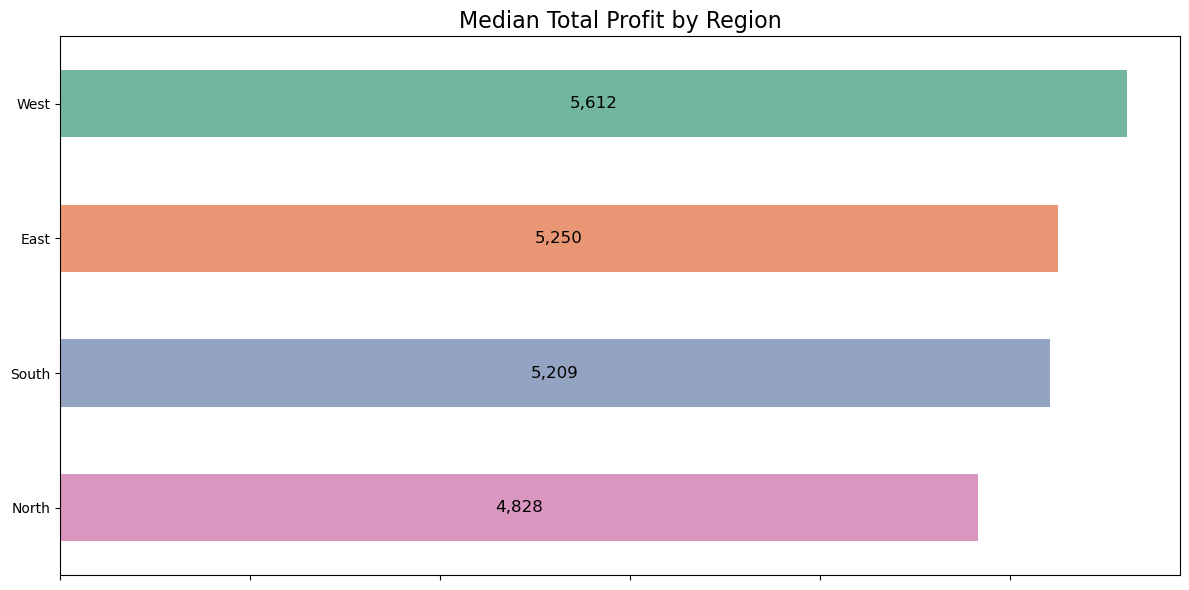

In [386]:
median_profit_region = data.groupby('Region')['Total_Profit'].median()
median_profit_region = median_profit_region.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=median_profit_region.values, y=median_profit_region.index, palette="Set2", hue=median_profit_region.index, errorbar=None, width=0.5)

for i in range(len(median_profit_region)):
    ax.text(median_profit_region.values[i] / 2, i, f'{median_profit_region.values[i]:,.0f}', ha='center', va='center', fontsize=12, color='black')

ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xticklabels([])
plt.title('Median Total Profit by Region', fontsize=16)
plt.tight_layout()
plt.show()

North Region:
Highest total sales (6,705 units) and highest total profits (1,666,461).
However, the median profit was the lowest (4,828), indicating significant fluctuations in monthly performance. While some months performed exceptionally well January: 51,066.15, others saw sharp drops May: 11,791.27.
West Region:
Second in total sales (6,486) and profits (1,656,092), but stood out with the highest median profit (5,612).
This suggests consistency in performance, with fewer extreme variations in monthly results. Even though West had some low months July: 3,023.48 overall, it maintained more stable profits compared to other regions.
East Region:
Close to North and West in total sales and profits, with a median profit of 5,250.
East experienced high months November: 53,158.57 and low months October: 10,919.57,  but its performance was more stable than North’s.
South Region:
Lowest total sales (5,808) and profits (1,519,737), but showed some strong months, particularly in November (59,249.28).
The median profit of 5,209 was similar to East, reflecting some variability in monthly performance, especially during months like June (6,607.47) and September (9,242.13).

#### Checking The Most Sold Products By Region

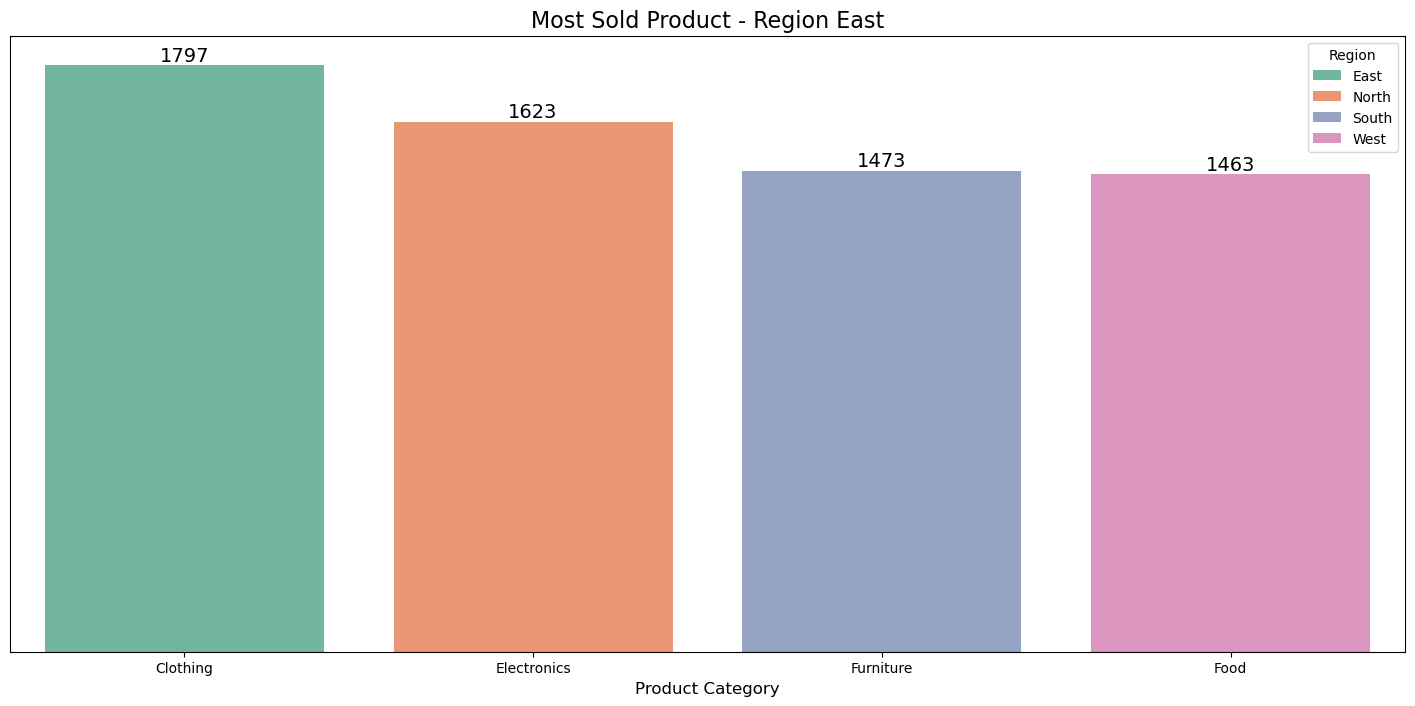

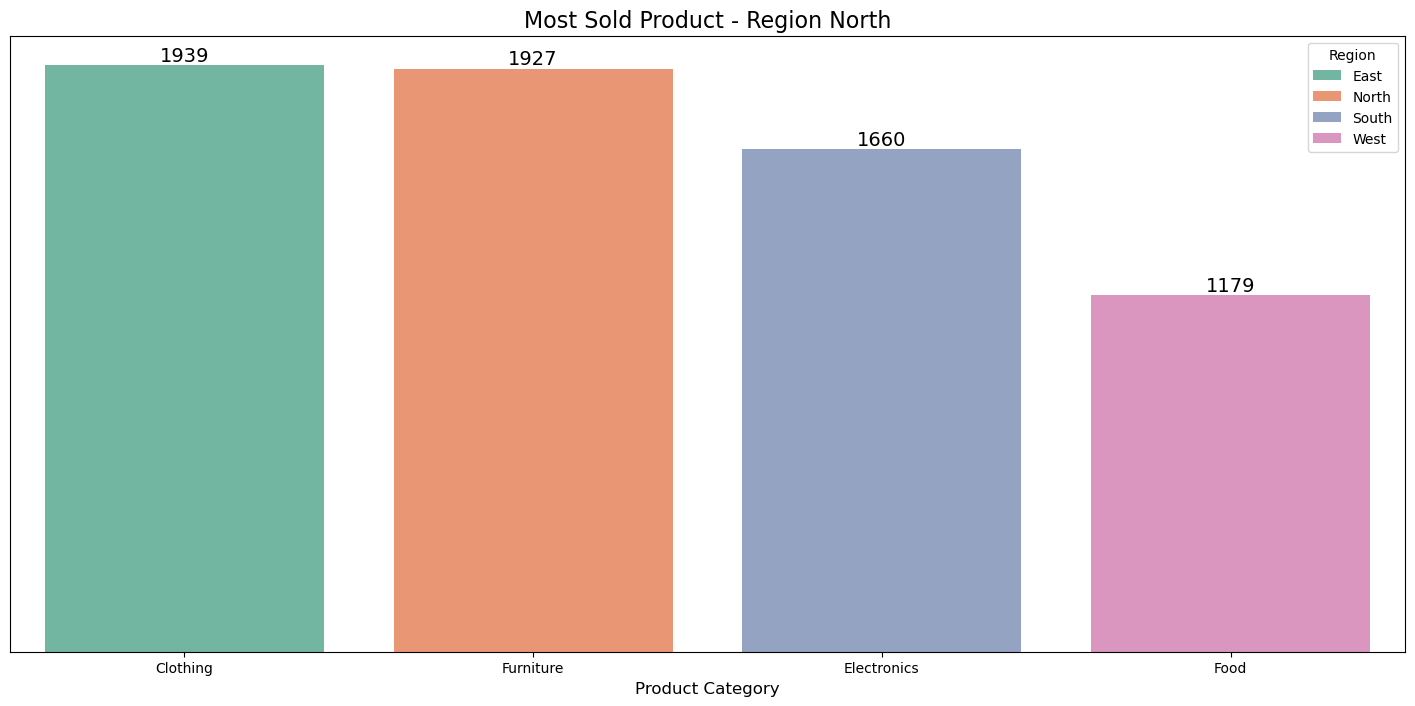

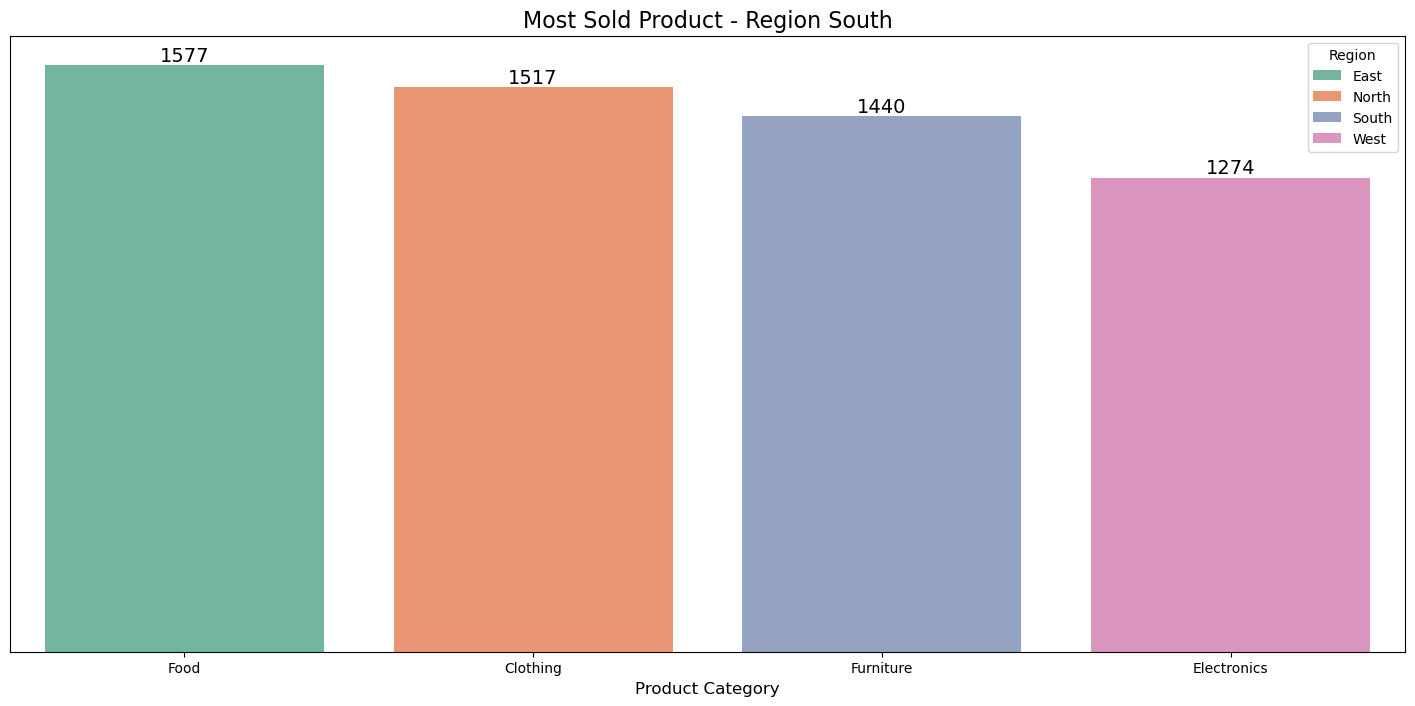

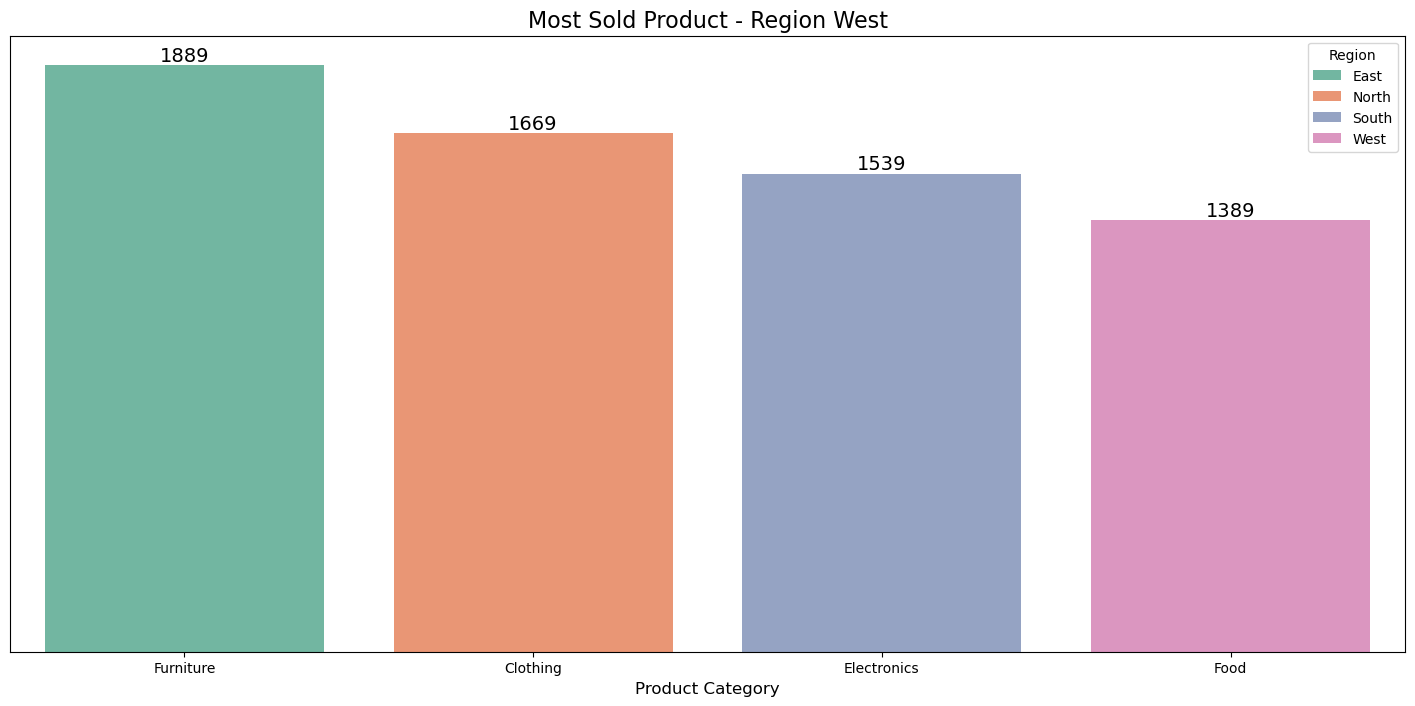

In [387]:
products_by_region = data.groupby(['Region', 'Product_Category'])['Quantity_Sold'].sum().unstack()
regions = products_by_region.index

for region in regions:
    plt.figure(figsize=(18, 8))
   
    region_data = products_by_region.loc[region]
   
    region_data = region_data.sort_values(ascending=False)
   
    ax = sns.barplot(x=region_data.index, y=region_data.values, palette="Set2", hue=products_by_region.index)
    for i, value in enumerate(region_data.values):
            ax.text(i, value + 0.05, f'{value}', ha='center', va='bottom', fontsize=14, color='black')
    ax.get_yaxis().set_visible(False)
    plt.title(f'Most Sold Product - Region {region}', fontsize=16)
    plt.xlabel('Product Category', fontsize=12)
    plt.xticks(rotation=0)
    plt.show()

Clothing: Leads in the North (1,939) and East (1,797) regions, making it a key product in these areas.
Furniture: Dominates in the West (1,889) and performs strongly in the North (1,927), highlighting its significance in these regions.
Electronics: Shows consistent sales across all regions, with East (1,623), West (1,539), North (1,660), and South (1,274), but doesn’t lead in any region.
Food: Most popular in the South (1,577) and East (1,463), but lags in the North (1,179) and West (1,389).

### Discounts Impact on Sales


#### Correlation Between Sales and Discounts  

In [388]:
correlation = data[['Discount', 'Quantity_Sold']].corr()
print("Correlation Between Sales and Discounts")
print(correlation)

Correlation Between Sales and Discounts
               Discount  Quantity_Sold
Discount       1.000000      -0.007806
Quantity_Sold -0.007806       1.000000


#### Breaking Down Discount By Region 

In [347]:
data['Discount_Amount'] = data['Sales_Amount'] * data['Discount']

region_discount_sales = data.groupby('Region')[['Discount_Amount', 'Sales_Amount']].sum()
region_discount_sales['Discount_Percentage'] = (region_discount_sales['Discount_Amount'] / region_discount_sales['Sales_Amount']) * 100
region_discount_sales['Discount_Percentage'] = region_discount_sales['Discount_Percentage'].round(2)
region_discount_sales['Discount_Percentage'] = region_discount_sales['Discount_Percentage'].apply(lambda x: f"{x} %")
region_discount_sales['Sales_Amount'] = region_discount_sales['Sales_Amount'].apply(lambda x: f"{x:,.2f}")
region_discount_sales['Discount_Amount'] = region_discount_sales['Discount_Amount'].apply(lambda x: f"{x:,.2f}")
print(region_discount_sales)

       Discount_Amount  Sales_Amount Discount_Percentage
Region                                                  
East        204,336.44  1,259,792.93             16.22 %
North       208,167.23  1,369,612.51              15.2 %
South       172,094.33  1,154,250.86             14.91 %
West        186,029.50  1,235,608.93             15.06 %


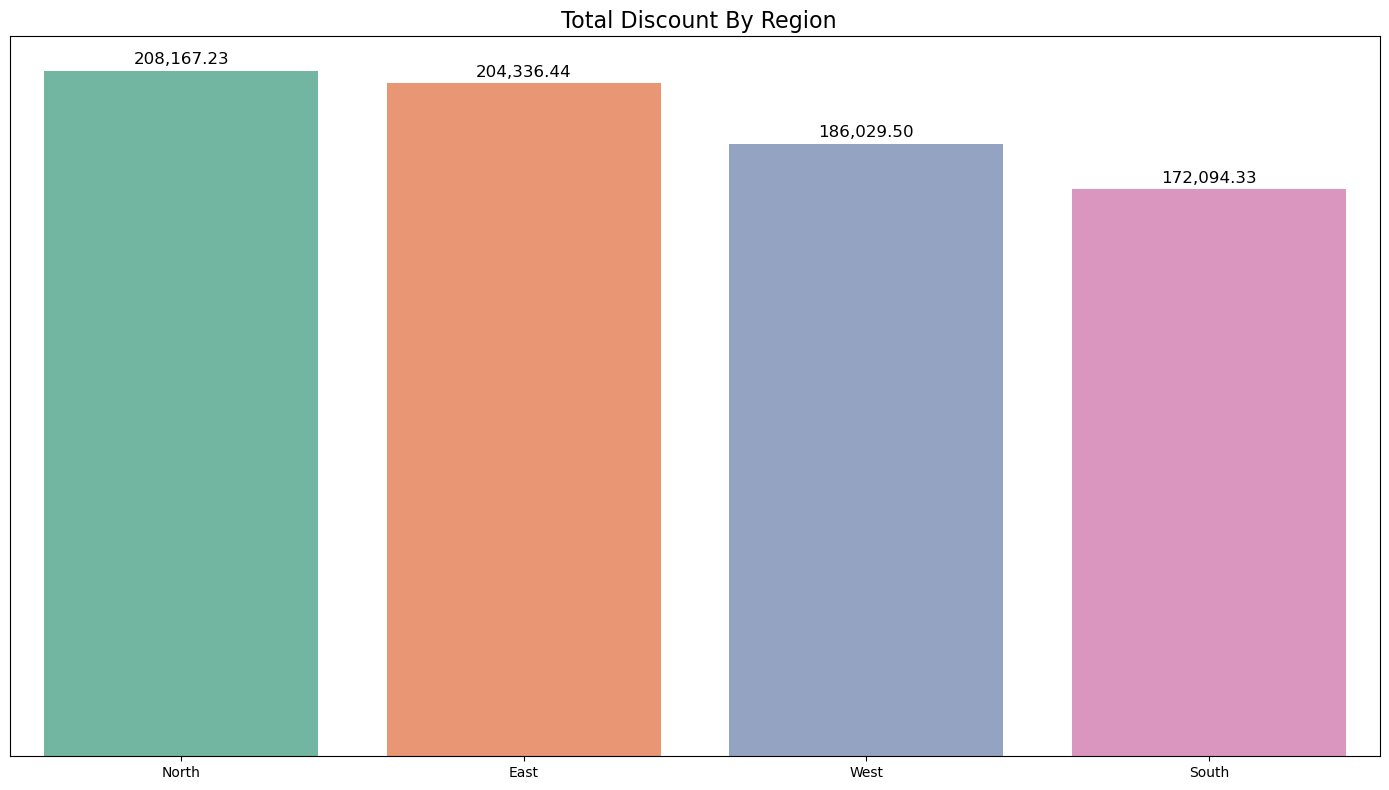

In [389]:
region_discount_total = data.groupby('Region')['Discount_Amount'].sum()
region_discount_total = region_discount_total.sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x=region_discount_total.index, y=region_discount_total.values, palette="Set2", hue=region_discount_total.index)
plt.title(' Total Discount By Region', fontsize=16)
plt.xlabel('Region', fontsize=12)

for i, v in enumerate(region_discount_total.values):
    plt.text(i, v + 1000, f'{v:,.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('')
plt.yticks([])   
plt.tight_layout()
plt.show()

The north is the one with the most discount 208,167 and east is the second one 204,336
followed by west 186,029 and south the last one 172,094

#### Correlation Discounts, Sales and Region 

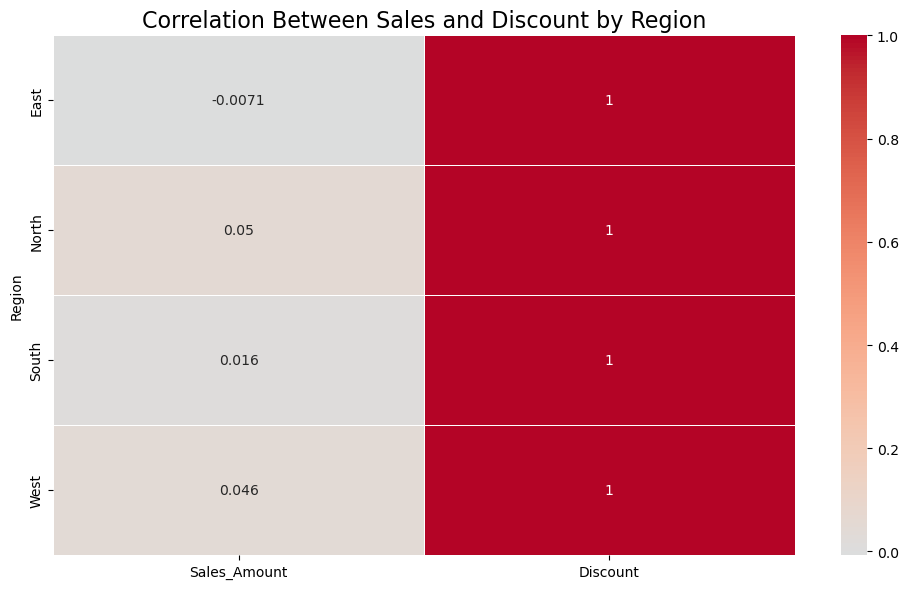

In [390]:
region_corr = data.groupby('Region')[['Sales_Amount', 'Discount']].corr()
region_corr = region_corr.xs('Discount', level=1, axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(region_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Between Sales and Discount by Region', fontsize=16)
plt.tight_layout()
plt.show()

#### Total of Discount by Product Category 

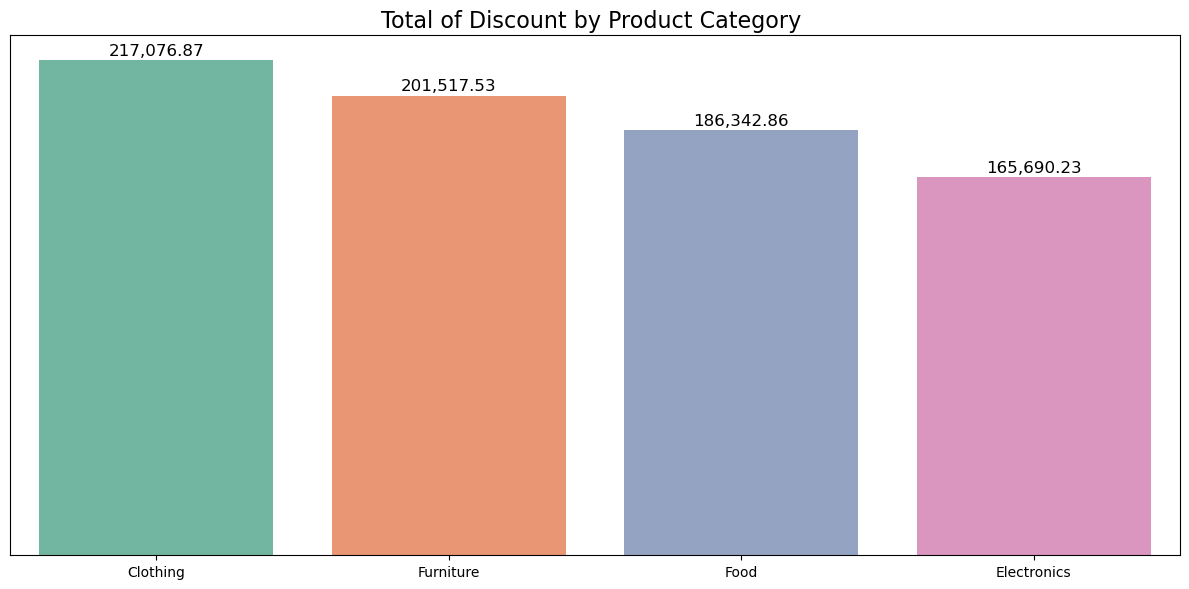

In [391]:
product_discount_total = data.groupby('Product_Category')['Discount_Amount'].sum()
product_discount_total = product_discount_total.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=product_discount_total.index, y=product_discount_total.values, palette="Set2", hue=product_discount_total.index)
for i, v in enumerate(product_discount_total.values):
    plt.text(i, v + 1000, f'{v:,.2f}', ha='center', va='bottom', fontsize=12, color='black')
plt.title('Total of Discount by Product Category ', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.tight_layout()
plt.show()

Clothing is the most sold and has the most discounts. Electronics is the second least sold and has the least discounts.
Furniture is the second product with the most discounts and is the one that sells the least.
Food has the third fewest discounts and is also the third least sold

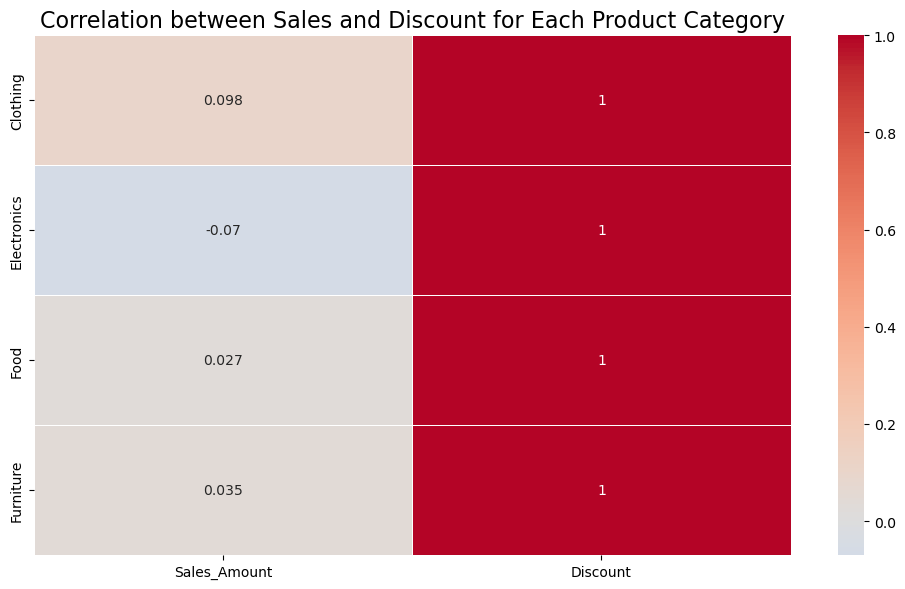

In [396]:
product_corr = data.groupby('Product_Category')[['Sales_Amount', 'Discount']].corr()
product_corr = product_corr.xs('Discount', level=1, axis=0)

plt.figure(figsize=(10, 6))
sns.heatmap(product_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation between Sales and Discount for Each Product Category', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

Correlation between Discount and Quantity Sold:
The correlation between Discount and Quantity Sold is -0.007806, which means there is almost no relationship between discounts and the number of units sold. In other words, discounts don’t seem to significantly affect how many units are sold.
Correlation between Discount and Sales Amount:
The correlation between Discount and Sales Amount is generally very low across regions:
East: The correlation is negative, meaning higher discounts did not lead to more sales in this region.
North, South, and West: The correlation is slightly positive, but still very low, suggesting a minor relationship between discounts and sales.
Total Discount by Region:
East: 204,336.44 in discounts (16.22% of sales).
North: 208,167.23 in discounts (15.2% of sales).
South: 172,094.33 in discounts (14.91% of sales).
West: 186,029.50 in discounts (15.06% of sales).
Even though some regions like North and East gave out large discounts, the correlation between discounts and sales remains low.
Discount by Product Category:
Clothing: 217,076.87 in discounts.
Furniture: 201,517.53 in discounts.
Food: 186,342.86 in discounts.
Electronics: 165,690.23 in discounts.
Conclusion:
Discounts do not seem to have a clear, strong impact on sales or quantity sold, based on the correlations.
Even in regions where large discounts were given (like North and East), the sales results did not show a direct or consistent increase.
Categories like Clothing and Furniture showed a stronger relationship between discounts and sales, likely due to the higher prices of these products.
Regional sales performance varied a lot, with some months showing strong sales, suggesting that other factors besides discounts are likely playing a bigger role in sales fluctuations.

In [394]:
discount_sales = data.groupby('Discount')['Sales_Amount'].sum()

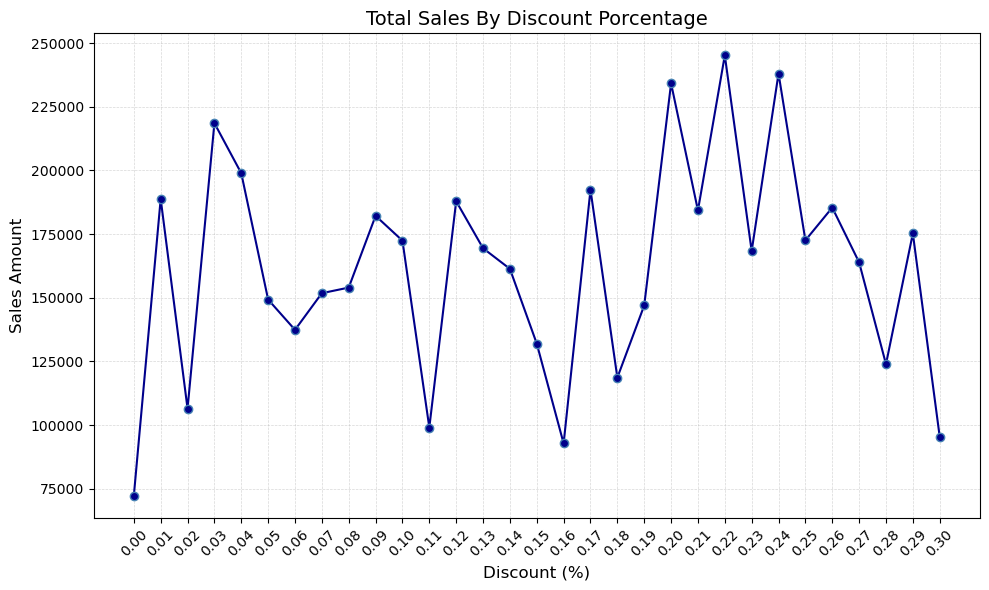

In [395]:
plt.figure(figsize=(10, 6))
plt.plot(discount_sales.index, discount_sales.values, marker='o', markeredgecolor='steelblue', color='#00008B', linestyle='-', markersize=6)
plt.title('Total Sales By Discount Porcentage', fontsize=14)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5, linewidth=0.5)
plt.xticks(discount_sales.index, rotation=45)
plt.tight_layout()
plt.show()


The peak sales occurred at a 22% discount, with sales reaching 245,214.09. This suggests that 22% discount is the sweet spot for maximizing sales in this range.
The sales amount declined slightly as the discount went higher or lower than 22%, indicating that 22% is likely the optimal discount.

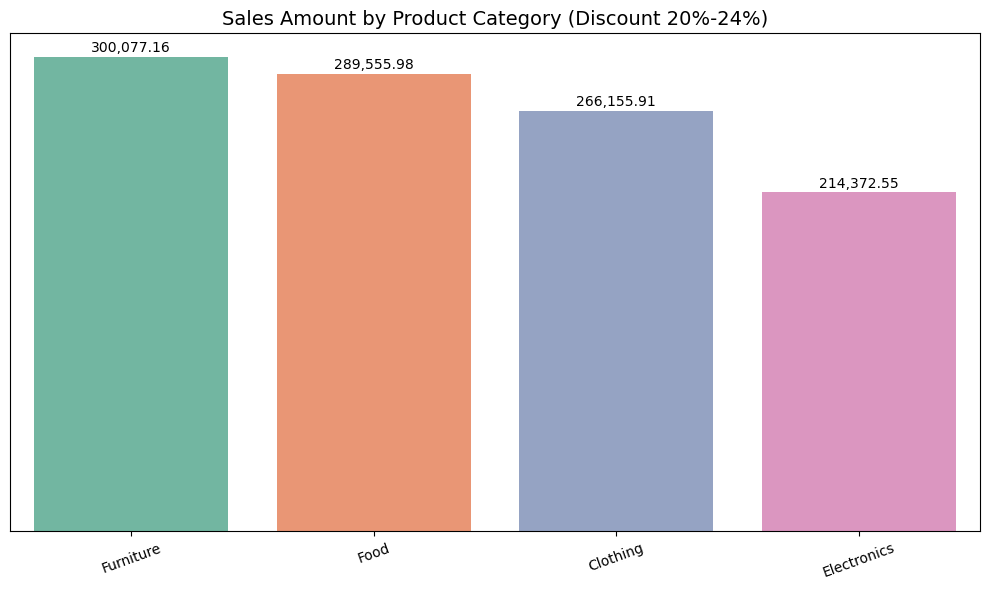

In [398]:
discount_range = data[(data['Discount'] >= 0.20) & (data['Discount'] <= 0.24)]
category_sales = discount_range.groupby('Product_Category')['Sales_Amount'].sum()
category_sales = category_sales.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="Set2", hue=category_sales.index)
plt.title('Sales Amount by Product Category (Discount 20%-24%)', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.yticks([])

for i, v in enumerate(category_sales.values):
    plt.text(i, v + 1000, f'{v:,.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=20)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

Furniture generated the highest total sales in the 20%-24% discount range, with 300,077.16 in sales.
Food came second, with 289,555.98 in sales.
Clothing followed, generating 266,155.91 in sales.
Electronics had the lowest sales in this range, with 214,372.55 in sales.

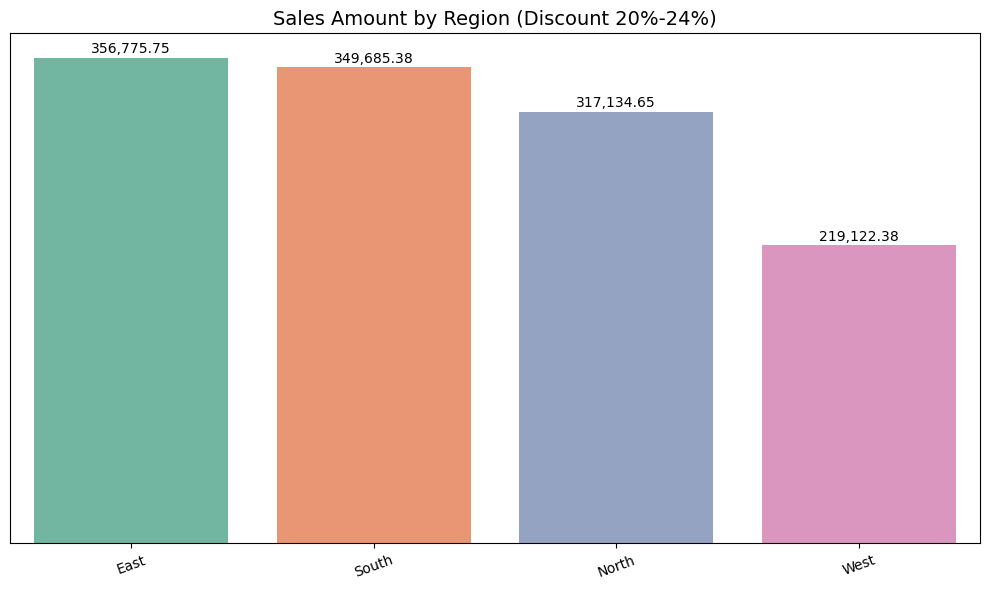

In [399]:
region_discount_range = discount_range.groupby('Region')['Sales_Amount'].sum()
region_discount_range = region_sales.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales_discount.index, y=region_sales_discount.values, palette="Set2", hue=region_sales_discount.index)
plt.title('Sales Amount by Region (Discount 20%-24%)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.yticks([])

for i, v in enumerate(region_sales_discount.values):
    plt.text(i, v + 1000, f'{v:,.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=20)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

The discount range from 20-24 in the regions shows that the East had the highest sales amount of 356,775.75, followed by the South with 349,685.38, the North with 317,134.65, and the West with 219,122.38.

### Customer Behavior

Customer_Type
New          504
Returning    496
Name: count, dtype: int64


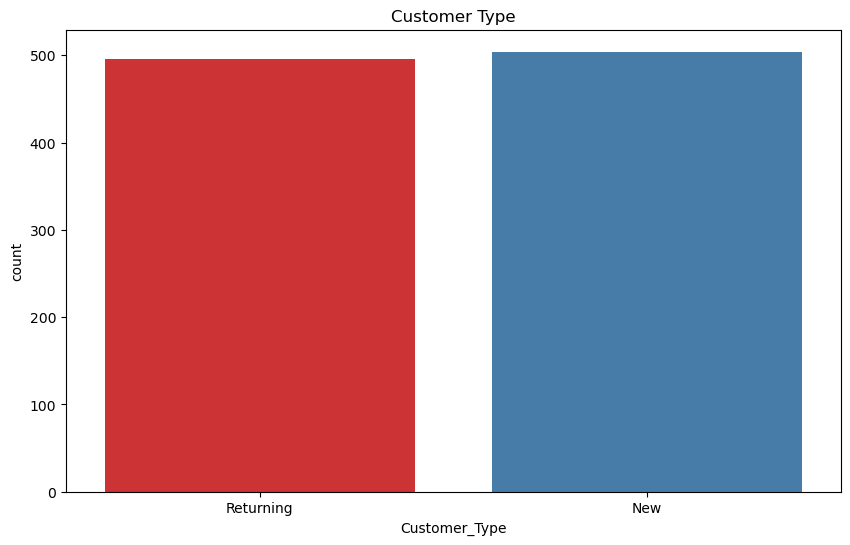

In [356]:
customer_type_counts = data['Customer_Type'].value_counts()
print(customer_type_counts)
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Type', data=data,  hue='Customer_Type', palette= "Set1")
plt.title("Customer Type")
plt.show()

There are slightly more new customers than returning customers: 504 new customers and 496 returning customers.

#### Total of Sales by Custumers 

In [400]:
sales_by_customer_type = data.groupby('Customer_Type')['Sales_Amount'].sum()
print(sales_by_customer_type)

Customer_Type
New          2506258.30
Returning    2513006.93
Name: Sales_Amount, dtype: float64


#### Type of Custumers By Region 


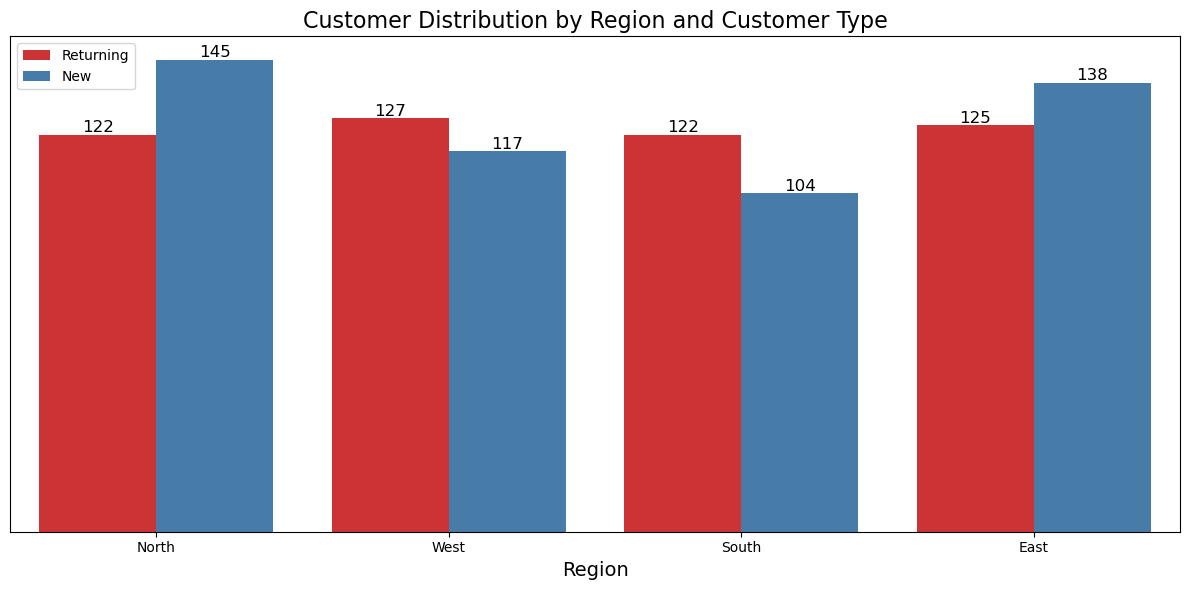

In [409]:
customer_counts_by_region = data.groupby(['Region', 'Customer_Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Region', hue='Customer_Type', data=data, palette='Set1')

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(f'{height:,.0f}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='center', fontsize=12, color='black', 
                    xytext=(0, 5), textcoords='offset points')

plt.gca().get_yaxis().set_visible(False)
plt.title("Customer Distribution by Region and Customer Type", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("")
plt.legend()
plt.tight_layout()
plt.show()

The North (145 new vs. 122 returning) and East (138 new vs. 125 returning) regions show a higher number of new customers compared to returning ones. This could suggest that these regions are seeing growth or new customer acquisition as a key factor for business development. 
On the other hand, the South (104 new vs. 122 returning) and West (117 new vs. 127 returning) regions have more returning customers than new ones, indicating a potentially stable or loyal customer base in these areas. 

#### Total of Sales by Custumers and Regions 

In [412]:
sales_by_region_and_customer_type = data.groupby(['Region', 'Customer_Type'])['Sales_Amount'].sum().unstack()
print(sales_by_region_and_customer_type)

Customer_Type        New  Returning
Region                             
East           678988.09  580804.84
North          762511.35  607101.16
South          518474.10  635776.76
West           546284.76  689324.17


#### Type of payment per Custumers 

In [413]:
payment_method_sales = data.groupby(['Payment_Method', 'Customer_Type'])['Sales_Amount'].sum().unstack()
print(payment_method_sales)

Customer_Type        New  Returning
Payment_Method                     
Bank Transfer   889778.5  827584.67
Cash            779810.5  764528.04
Credit Card     836669.3  920894.22


New customers and returning customers have almost equal sales, with returning customers slightly ahead by about 6750 units in total sales.
The North region generates the most sales for new customers (762,511.35), followed by East, South, and West regions.
The West region has the highest sales for returning customers (689,324.17), followed by North, South, and East.
Bank Transfer: Returning customers (827,584.67) slightly outperformed new customers (889,778.5) in terms of sales.
Cash: New customers (779,810.5) had higher sales than returning customers (764,528.04).
Credit Card: Returning customers (920,894.22) had more sales than new customers (836,669.3).
Returning customers tend to have higher sales in the West region , while new customers have stronger sales in the North region.

#### Sales Throughout the Year: Returning and New Customers

<Figure size 1200x600 with 0 Axes>

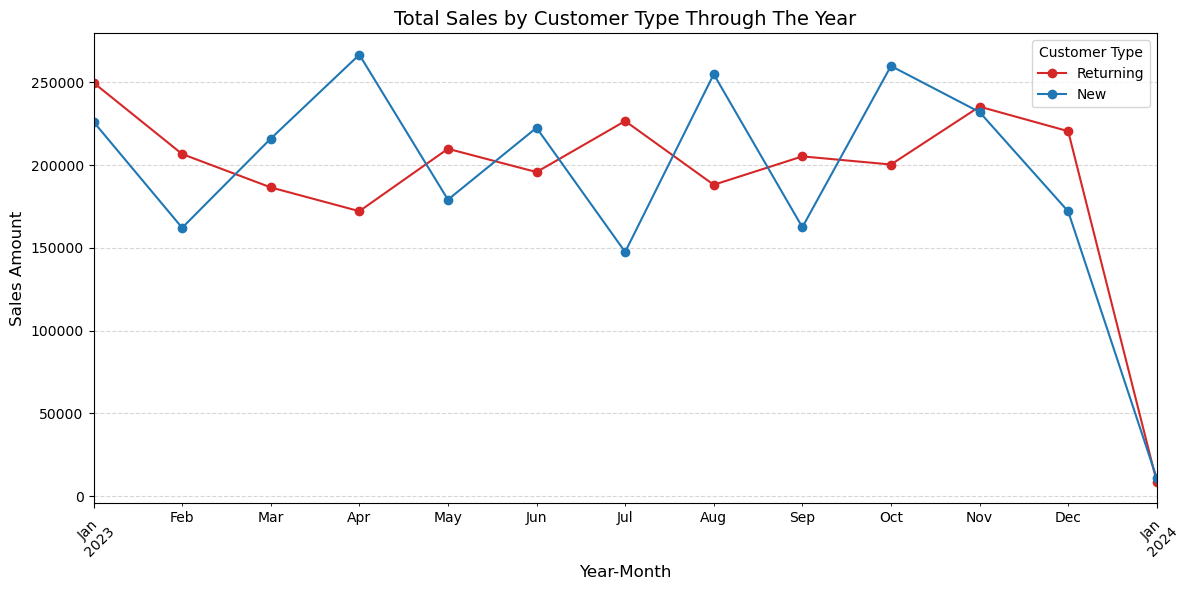

Year_Month,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01
Customer_Type,,,,,,,,,,,,,
New,249859.39,206748.75,186581.43,172203.80,209911.99,195841.06,226692.21,188161.24,205328.53,200410.13,235385.17,220554.88,8579.72
Returning,226232.97,162170.61,216057.34,266788.81,179166.77,222617.28,147550.67,255010.04,162509.07,259968.65,232097.73,172088.70,10748.29


In [414]:
sales_customer_type_month = data.groupby(['Customer_Type', 'Year_Month'])['Sales_Amount'].sum().unstack()

plt.figure(figsize=(12, 6))
sales_customer_type_month.T.plot(kind='line', marker='o', figsize=(12, 6), color=['#d62728', '#1f77b4'])  # Cores para Returning e New
plt.title('Total Sales by Customer Type Through The Year', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(rotation=45)  # Ajuste para melhorar a visualização das legendas
plt.legend(title='Customer Type', labels=['Returning', 'New'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

sales_customer_type_month

The line for New customers shows big ups and downs, meaning their sales fluctuate a lot month to month. On the other hand, the line for Returning customers is steadier, with more consistent sales over time. New customers had the highest peaks during the year in April, August, and October.

#### Total Sales Per Discount and  Type of Customers 

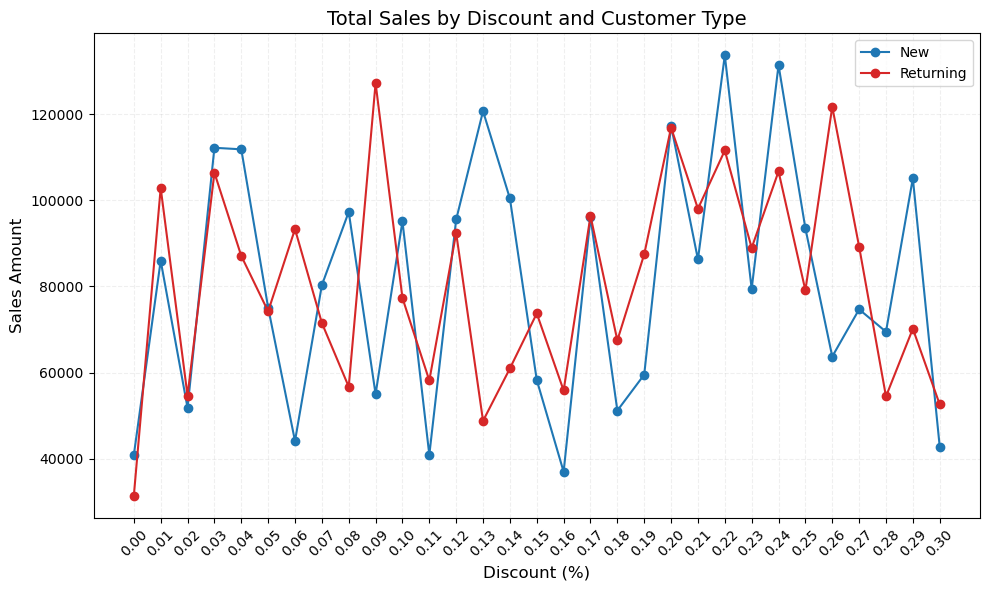

In [415]:
discount_customer_sales = data.groupby(['Discount', 'Customer_Type'])['Sales_Amount'].sum().unstack()

plt.figure(figsize=(10, 6))
plt.plot(discount_customer_sales.index, discount_customer_sales['New'], label='New', marker='o', color='#1f77b4')
plt.plot(discount_customer_sales.index, discount_customer_sales['Returning'], label='Returning', marker='o', color="#d62728")

plt.title('Total Sales by Discount and Customer Type', fontsize=14)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.legend()
plt.xticks(discount_customer_sales.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

New Customers Peak Discounts: New customers seem to experience a peak in sales around the discount percentages of 0.22 and 0.24. This is clear because the sales for New customers at those discount levels are significantly higher compared to surrounding discount levels.
Peak Discount: Returning customers seem to have a strong peak at 0.09 (the discount of 0.09 has the highest sales for Returning customers). There is also noticeable consistency in sales between 0.09 to 0.22.

#### Products by Customer Type 

Product_Category   Clothing  Electronics       Food  Furniture
Customer_Type                                                 
New               703229.55    642710.00  603342.47  556976.28
Returning         610244.81    600789.64  598431.07  703541.41


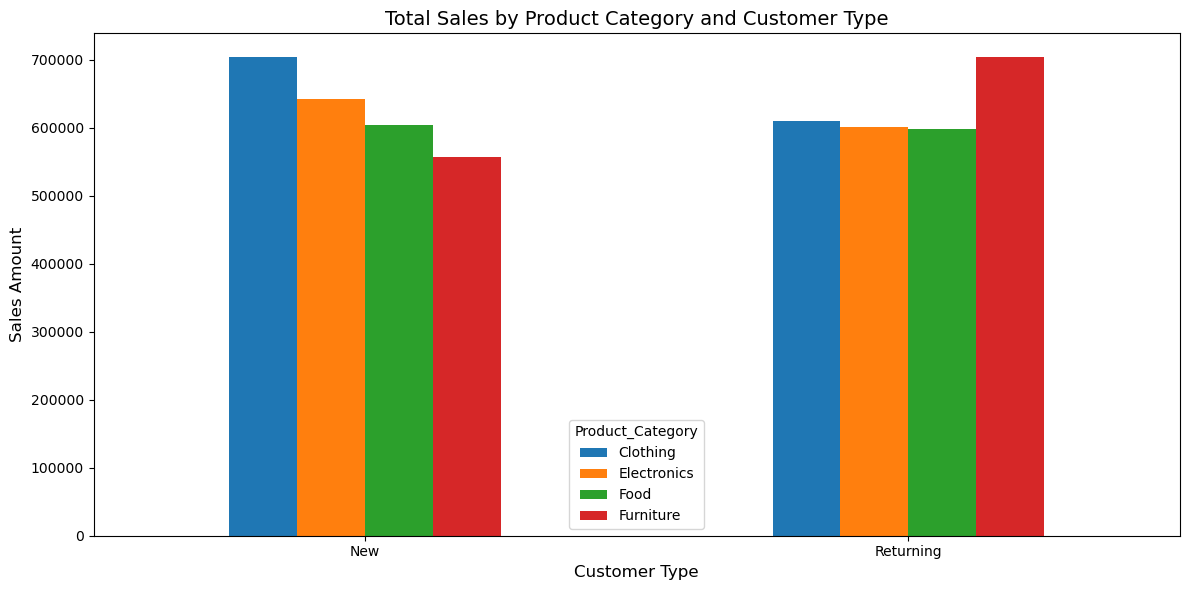

In [364]:
category_by_customer = data.groupby(['Customer_Type', 'Product_Category'])['Sales_Amount'].sum().unstack()
print(category_by_customer)

category_by_customer.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by Product Category and Customer Type', fontsize=14)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Returning customers spend more on furniture, which is what they spend the most on. The sales of the other products, such as clothing, electronics, and food, are very similar in terms of sales amount, with the difference being quite small.
New customers spend more on clothing than on electronics, food, and furniture. The differences between products for new customers are more significant than for returning ones. For returning customers, clothing, electronics, and food have pretty much the same sales amount, while for new customers, the differences are a bit larger.

# Sales Channel

##### Online and Retail

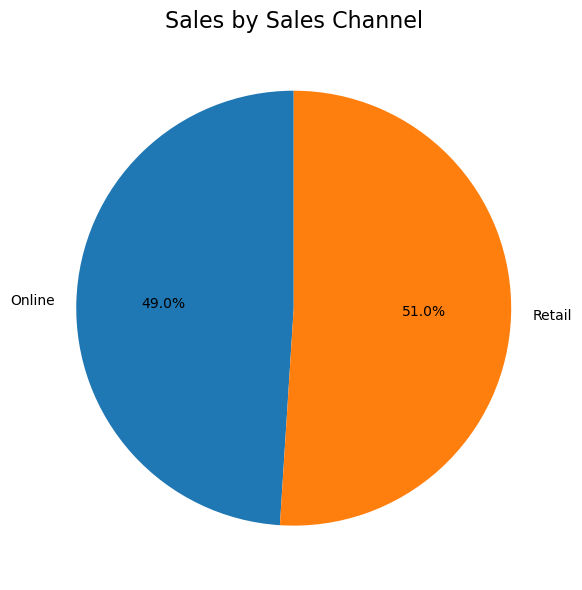

Sales_Channel
Online    2458833.93
Retail    2560431.30
Name: Sales_Amount, dtype: float64

In [365]:
sales_channel = data.groupby("Sales_Channel")["Sales_Amount"].sum()

plt.figure(figsize=(8, 6))
sales_channel.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=90)
plt.title('Sales by Sales Channel', fontsize=16)
plt.ylabel('') 
plt.tight_layout()
plt.show()
sales_channel

The pie chart shows that 51% of the sales were made through Retail and 49% through Online. This indicates that sales in Retail and Online are nearly equal, with a slight edge towards retail sales. This suggests that both channels contribute almost equally to the total sales.

  Sales_Channel Region  Sales_Amount
0        Online   East     575222.27
1        Online  North     683133.46
2        Online  South     590593.38
3        Online   West     609884.82
4        Retail   East     684570.66
5        Retail  North     686479.05
6        Retail  South     563657.48
7        Retail   West     625724.11


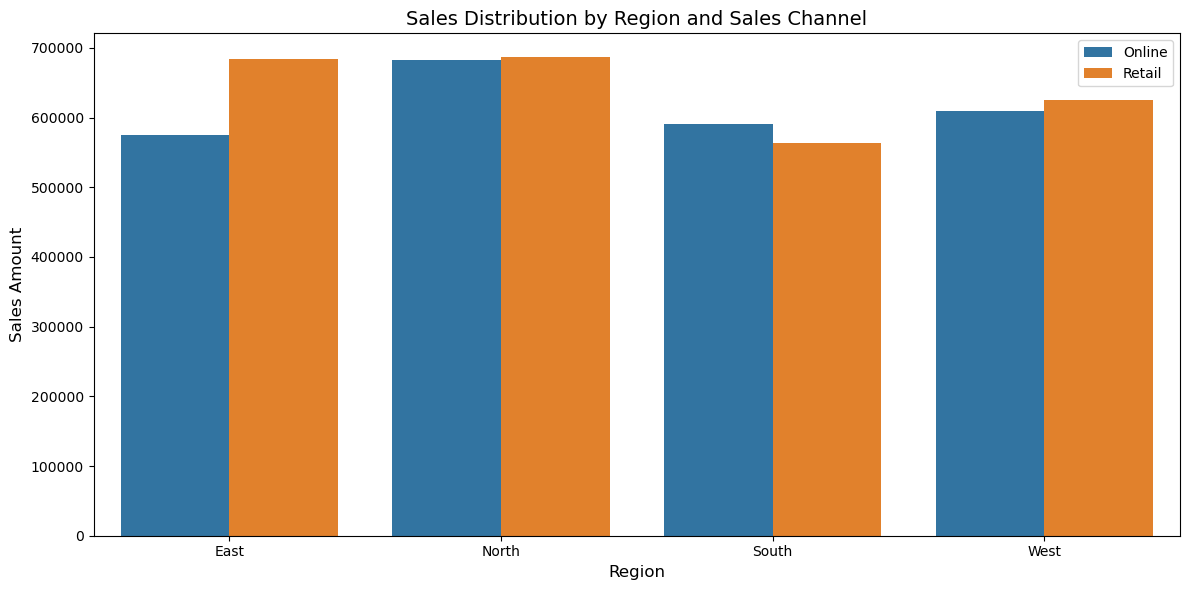

In [420]:
sales_channel_region = data.groupby(['Sales_Channel', 'Region'])['Sales_Amount'].sum().reset_index()
color_palette = ['#1f77b4', '#ff7f0e'] 
print(sales_channel_region)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales_Amount', hue='Sales_Channel', data=sales_channel_region, palette=color_palette)
plt.title('Sales Distribution by Region and Sales Channel', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

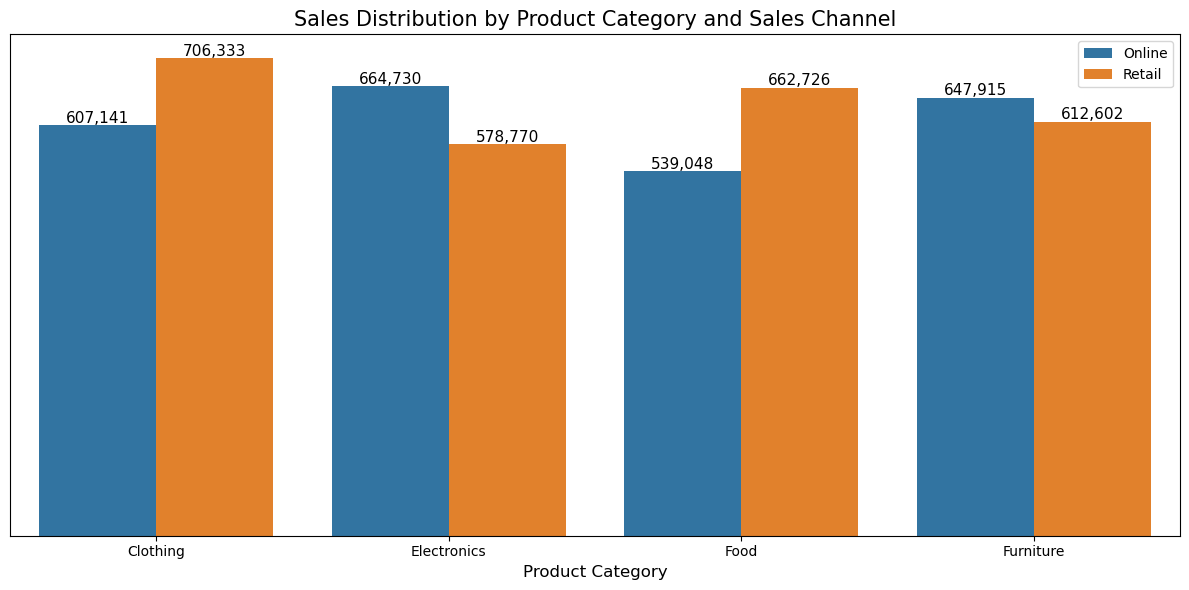

In [367]:
sales_channel_product = data.groupby(['Product_Category', 'Sales_Channel'])['Sales_Amount'].sum().reset_index()
color_palette = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Product_Category', y='Sales_Amount', hue='Sales_Channel', data=sales_channel_product, palette=color_palette)
plt.title('Sales Distribution by Product Category and Sales Channel', fontsize=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.legend()

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center',
                    fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

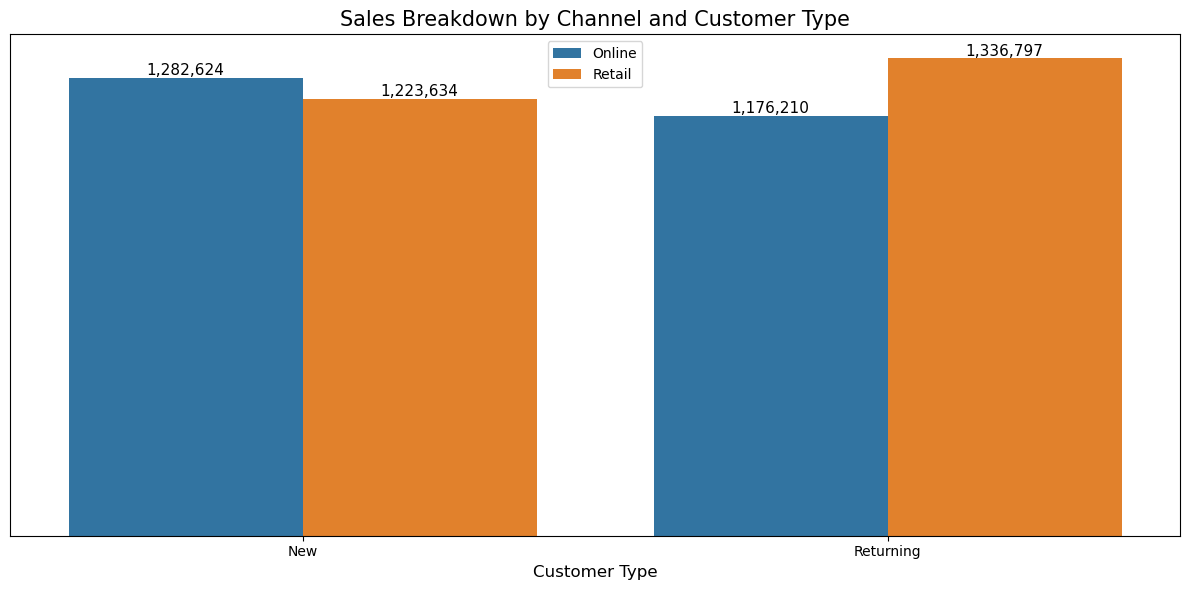

In [368]:
sales_channel_customer = data.groupby(['Sales_Channel', 'Customer_Type'])['Sales_Amount'].sum().reset_index()
color_palette = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Customer_Type', y='Sales_Amount', hue='Sales_Channel', data=sales_channel_customer, palette=color_palette)
plt.title('Sales Breakdown by Channel and Customer Type', fontsize=15)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.legend(loc='upper center')

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center',
                    fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

ax.get_yaxis().set_visible(False) 
plt.tight_layout()
plt.show()

Online customers buy more Online, and returning buy more in retail 

##### Discounts By Sales Channel

In [369]:
discount_sales_channel = data.groupby('Sales_Channel')['Discount'].mean().reset_index()
print(discount_sales_channel)


  Sales_Channel  Discount
0        Online  0.152561
1        Retail  0.152227


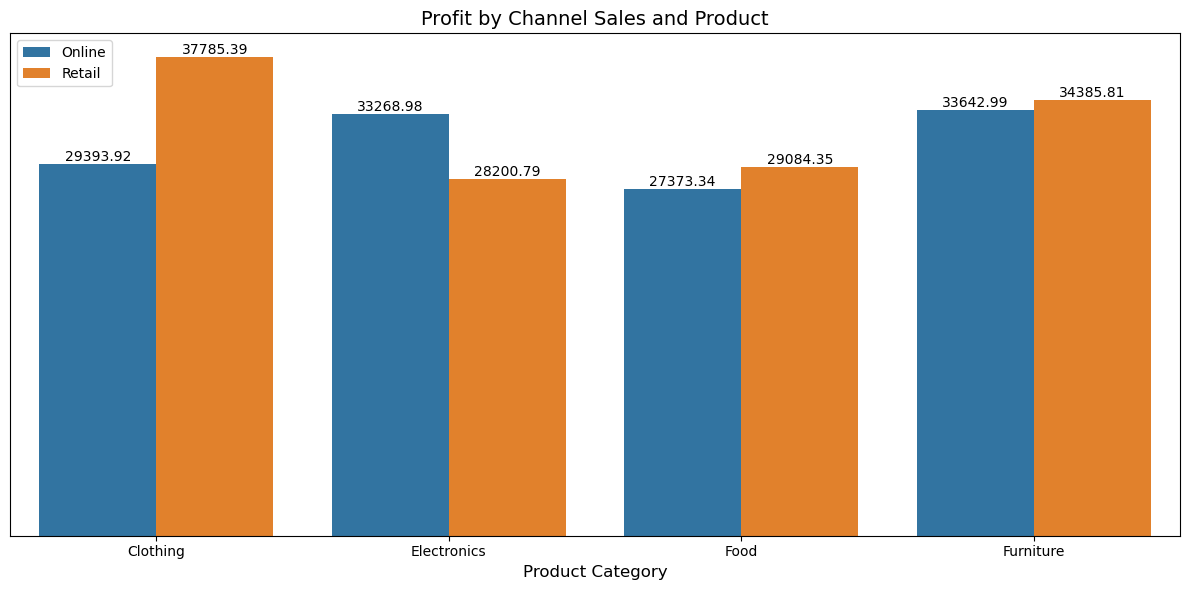

In [370]:
data['Profit_Per_Unit'] = data['Unit_Price'] - data['Unit_Cost']
profit_by_channel = data.groupby(['Sales_Channel', 'Product_Category'])['Profit_Per_Unit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category', y='Profit_Per_Unit', hue='Sales_Channel', data=profit_by_channel, palette=color_palette)
plt.title('Profit by Channel Sales and Product', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('')
plt.gca().get_yaxis().set_visible(False)

for p in plt.gca().patches:
    height = p.get_height()
    if height > 0: 
        plt.text(p.get_x() + p.get_width() / 2, height, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Retail is the sales channel with the most profit from the products, apart from Electronics, which is the most sold product online with a sales amount of $664,729.67.

### Report


Overview
The sales data from the past year displayed steady growth for the most part. However, there was a sharp decline in January 2024, which might have been due to a lack of sufficient data during this period. The purpose of this report is to analyze the sales trends, regional differences, the effects of discounts, product performance, and customer behavior to understand the reasons behind these changes and to offer suggestions for improving sales moving forward.

Sales Trends and Performance
When we looked at sales from November 2023 to January 2024, it was clear that sales were relatively stable for most of the year. In November 2023, total sales were 467,482.90, but there was a decrease to 392,643.58 in December, which marked a 16% drop. The most concerning period was January 2024, where sales dropped drastically to $19,328.01. This was nearly a 95% decrease from December, which might be linked to the lack of proper data or some other external issue, but further investigation is needed to confirm this.

Regional Sales Breakdown
Sales performance varied significantly across different regions, with each showing different trends throughout the year:
East Region: The East region consistently performed the best. In November 2023, it saw a peak in sales, especially in Food and Clothing categories.
North Region: Sales here were more inconsistent. Notably, the region recorded zero sales in January 2024, which significantly impacted the overall performance. This might be linked to a lack of marketing or other regional challenges.
South Region: The South region showed relatively steady sales throughout the year. While there was a slight dip in January, it remained the most consistent performer compared to the other regions.
West Region: The West faced noticeable sales drops, especially in March 2023, but managed to recover by the end of the year.

Product Performance
Different product categories showed varying levels of performance across the year:
Clothing: This was the highest-selling category, with 6,922 units sold overall. It had steady sales for most of the year, with a noticeable peak in August 2023. However, like other categories, Clothing sales dropped drastically in January 2024.
Furniture: Furniture had strong sales, especially in May and during the latter half of the year. It was also a key driver of sales in the East region.
Electronics: Sales of Electronics remained relatively stable, although there was a dip in the West region in March 2023. Despite this, the category performed consistently across other regions.
Food: Food sales were strong in several months, particularly in September and November, with the East region contributing significantly to these figures.

Impact of Discounts on Sales
Discounts were offered throughout the year, but their effect on driving sales wasn't as strong as expected. The biggest discount offered was 22%, which resulted in the highest sales of $245,214.09. This suggests that offering a discount of around 22% is likely the most effective range for generating sales.
Regional Insights on Discounts:
The North Region offered the highest discounts, but the correlation between these discounts and sales wasn’t strong, indicating that larger discounts did not necessarily result in better sales.
In the East, South, and West Regions, the results were mixed, showing that discounts did not consistently boost sales across all regions.

Customer Insights
Sales came from both new and returning customers, with new customers contributing slightly more revenue at $2,506,258.30 compared to 2,513,006.93 from returning customers. New customers tended to make their first purchases during specific months, such as April, August, and October, while returning customers showed more consistent buying habits.

Regional Customer Insights:

The North and East Regions attracted a higher number of new customers, likely due to stronger promotions or better marketing efforts in those areas.
The South and West Regions had a larger base of returning customers, suggesting greater customer loyalty in these regions.

Online vs. Retail Sales
Sales were almost equally divided between online and retail, with retail slightly outperforming online sales (2,560,431.30 for retail vs. $2,458,833.93 for online). In the East, retail was the dominant sales channel, while the South showed slightly higher online sales.

Channel-Specific Product Insights:
Clothing performed better in physical retail stores, likely because customers prefer to try on clothes in person.
Electronics, on the other hand, performed better online, which suggests that people prefer buying electronics through e-commerce platforms.

Recommendations

Discount Strategy: Offering discounts around 20%-24% seems to have the most positive impact on sales. Future campaigns should aim for this range to maximize revenue, particularly during peak shopping months.

Focus on Attracting New Customers in the South and West: These regions showed solid performance from returning customers, but increasing efforts to attract new customers could help push sales even further. Digital marketing campaigns or loyalty programs may be helpful.

Optimize Online and Retail Sales Channels: While sales are fairly split between online and retail, focusing on optimizing product offerings for each channel can help. For example, Clothing should continue to be marketed in stores, while Electronics should have more online-focused promotions.

Focus on High-Performing Products: Clothing, Furniture, and Electronics are the top-selling categories, and campaigns that emphasize these products, particularly in regions where they perform best, could drive higher sales.

Conclusion
The sales trends over the past year show both challenges and areas for improvement. While discounts do play a role, they are not the sole driver of sales. A more targeted approach, focusing on regional preferences, customer behavior, and strengthening both online and retail channels, will help the company maintain growth and stability. By following the recommendations in this report, we can improve sales performance in the upcoming months.

### PART 2 : Sales Quantity Prediction Using Machine Learning Models



In [423]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [424]:
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Year_Month,Total_Profit,Profit_Margin,Discount_Amount,Profit_Per_Unit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2023-02,2060.46,40.769138,454.8573,114.47
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,2023-04,6681.85,152.413766,482.2422,393.05
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,2023-09,3295.20,71.151724,926.2460,109.84
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2023-08,5371.08,247.750399,43.3588,137.72
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,2023-03,719.42,19.183510,300.0160,55.34


In [425]:
data_2023 = data[data['Sale_Date'].dt.year == 2023]

In [426]:
data_2023_copy = data_2023.copy()

data_2023_copy['Month'] = data_2023_copy['Sale_Date'].dt.month
data_2023_copy['Day_of_Week'] = data_2023_copy['Sale_Date'].dt.dayofweek

X = data_2023_copy[['Region','Total_Profit', 'Product_Category', 
                    'Unit_Price', 'Customer_Type', 'Discount', 
                    'Payment_Method', 'Sales_Channel', "Profit_Per_Unit",
                    'Month', 'Day_of_Week',"Discount_Amount", 'Sales_Amount']]


y = data_2023_copy["Quantity_Sold"]

In [427]:
X_encoded = pd.get_dummies(X, drop_first=True)
print(X_encoded.head())

   Total_Profit  Unit_Price  Discount  Profit_Per_Unit  Month  Day_of_Week  \
0       2060.46      267.22      0.09           114.47      2            4   
1       6681.85     4209.44      0.11           393.05      4            4   
2       3295.20      371.40      0.20           109.84      9            3   
3       5371.08     4467.75      0.02           137.72      8            3   
4        719.42      692.71      0.08            55.34      3            4   

   Discount_Amount  Sales_Amount  Region_North  Region_South  Region_West  \
0         454.8573       5053.97          True         False        False   
1         482.2422       4384.02         False         False         True   
2         926.2460       4631.23         False          True        False   
3          43.3588       2167.94         False          True        False   
4         300.0160       3750.20         False         False        False   

   Product_Category_Electronics  Product_Category_Food  \
0         

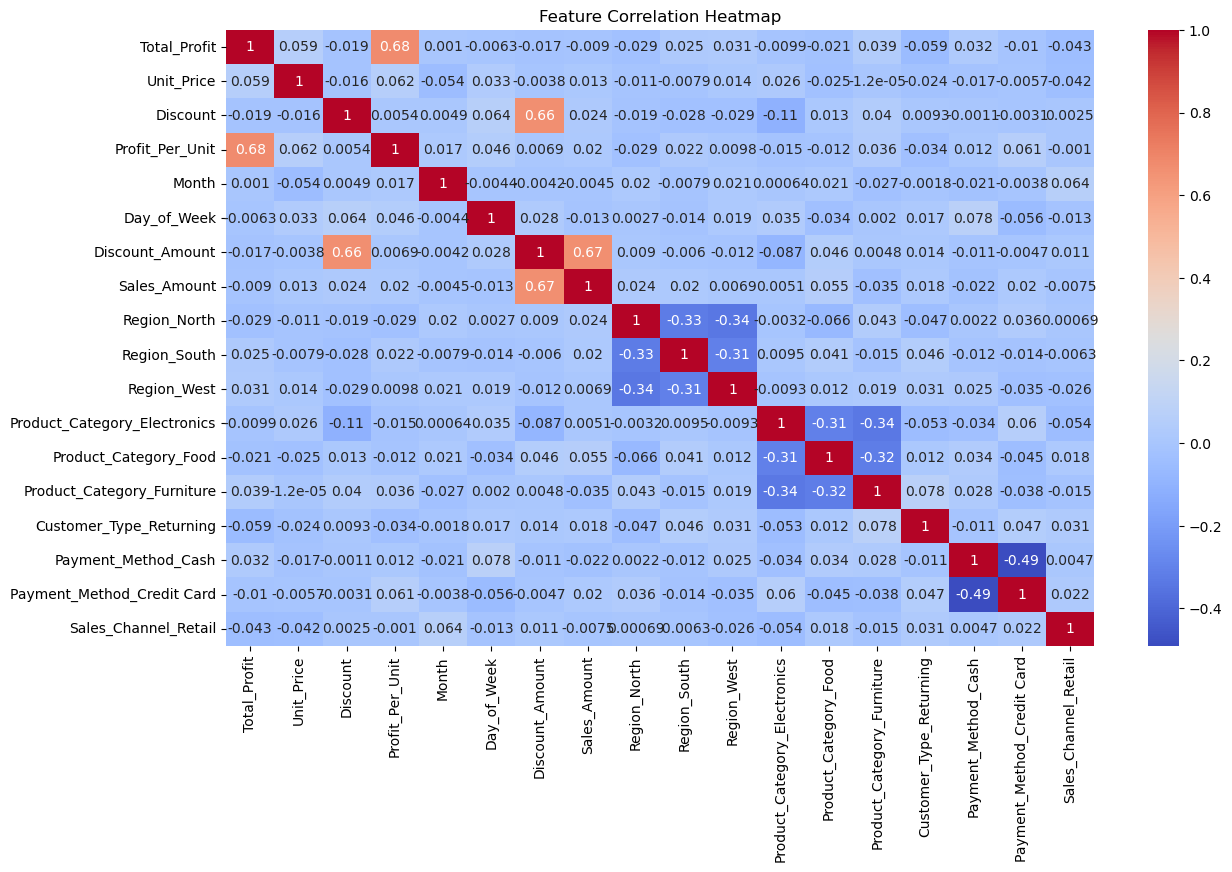

In [428]:
plt.figure(figsize=(14, 8))
sns.heatmap(X_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

#### Linear Regression

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [430]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.7375833707963193
Mean Squared Error: 51.5994803919152
Mean Absolute Error: 5.352232705753352


#### Polynomial

In [379]:
poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X_encoded)  

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
mae_poly = mean_absolute_error(y_test, y_poly_pred)

print(f"R-squared: {r2_poly}")
print(f"Mean Squared Error: {mse_poly}")
print(f"Mean Absolute Error: {mae_poly}")

R-squared: 0.8515012215834419
Mean Squared Error: 29.19959694772682
Mean Absolute Error: 3.678332044061972


In [380]:
real_values = y_test
predicted_values = y_poly_pred 

comparison_df = pd.DataFrame({'Real Values': real_values, 'Predicted Values': predicted_values})
print(comparison_df.head())

     Real Values  Predicted Values
454           10         26.531642
794           45         38.259575
209           45         38.897580
309           19         16.372407
741            4          5.206243


#### Random Florest

In [446]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42) 

random_forest_model.fit(X_train, y_train)

y_forest_pred = rf_model.predict(X_test)

r2_forest = r2_score(y_test, y_forest_pred)
mse_forest = mean_squared_error(y_test, y_forest_pred)
mae_forest = mean_absolute_error(y_test, y_forest_pred)

print(f"R-squared: {r2_forest}")
print(f"Mean Squared Error: {mse_forest}")
print(f"Mean Absolute Error: {mae_forest}")

R-squared: 0.969007231278343
Mean Squared Error: 6.094167
Mean Absolute Error: 1.4390000000000003


In [449]:
real_predicted_values = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_forest_pred})
print(real_predicted_values.head())

     Real Values  Predicted Values
454           10              7.11
794           45             43.49
209           45             42.30
309           19             20.24
741            4              4.41


#### Cross-Validation

In [443]:
cross_validation = cross_val_score(rf_model, X_encoded, y, cv=5, scoring='r2') 
print("Cross-Validation R2 Scores: ", cross_validation)
print(f"Average R2 Score (Cross-Validation): {np.mean(cross_validation)}")

Cross-Validation R2 Scores:  [0.97115013 0.96559458 0.98594383 0.98194981 0.98174599]
Average R2 Score (Cross-Validation): 0.9772768673626169


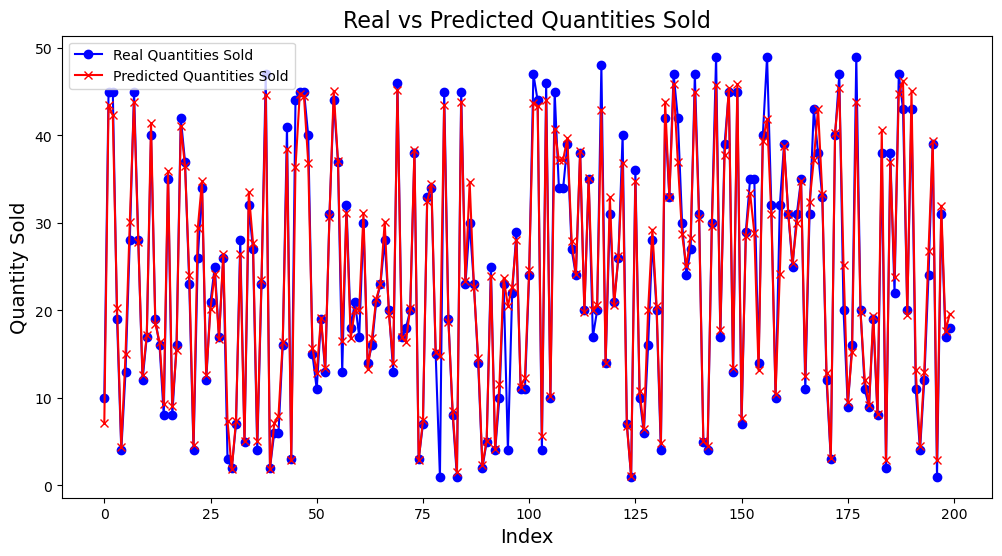

In [451]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Real Quantities Sold', color='blue', marker='o')
plt.plot(y_forest_pred, label='Predicted Quantities Sold', color='red', marker='x')
plt.title('Real vs Predicted Quantities Sold', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.legend()
plt.show()


#### Report Part 2:


In Part 2 of the project, the focus was on utilizing machine learning models to predict sales quantities. Accurate sales forecasts are essential for businesses to optimize inventory, plan marketing strategies, and streamline operations. By predicting future demand, businesses can ensure they have the right products at the right time, improving both efficiency and profitability.

Data Preprocessing:
Before training any models, data was carefully prepared to ensure it was suitable for machine learning. Key steps included:
Feature Selection: The target variable Quantity_Sold was chosen as the focus for prediction, as it directly correlates with the goal of forecasting future sales. The features included:
Region, Product Category, Customer Type, Payment Method, Sales Channel, Month, Day of the Week (along with other variables like profit per unit and discount percentage).
Encoding Categorical Variables: Categorical features like Region and Product Category were converted into numerical values using one-hot encoding. This allowed the machine learning models to process these variables effectively.
Data Split: The dataset was split into an 80-20 ratio: 80% for training the models and 20% for testing them. This ensured that the models were trained on a portion of the data while evaluated on a separate set to gauge performance.
Model Selection and Training:

Three different machine learning models were trained to predict sales quantities. The models tested were:

Linear Regression: A simple linear regression model was used initially, as it’s a baseline method for continuous value prediction. This model assumes a linear relationship between features and the target.
Training Results:
R²: 0.738 (indicating that the model explained 73.8% of the variance in sales quantities).
MSE: 51.60
MAE: 5.35

Although this model was a good starting point, the performance suggested there might be more complex relationships in the data that a simple linear model couldn't capture.

Polynomial Regression: To explore more complex relationships between the features and the target variable, a polynomial regression was applied. Polynomial terms were added to capture non-linear relationships.
Training Results:
R²: 0.852
MSE: 29.20
MAE: 3.68

The polynomial regression model showed an improvement over linear regression, reducing both MSE and MAE, indicating better accuracy in sales predictions.

Random Forest Regression: A Random Forest model, an ensemble learning method, was used next. It works by combining the predictions of multiple decision trees, making it less likely to overfit and providing a more robust model.
Training Results:
R²: 0.969
MSE: 6.09
MAE: 1.44

The Random Forest model significantly outperformed the other models, with the highest R² score and the lowest MSE and MAE, demonstrating its ability to capture complex patterns in the data and make accurate predictions.

The Random Forest model emerged as the best performer, providing the most accurate sales quantity predictions. It was able to explain the majority of variance in the data and had the lowest prediction errors.

Cross-Validation:
To ensure the model's stability and generalization, cross-validation was performed. The Random Forest model was evaluated across multiple folds, producing consistent results.
Cross-Validation R² Scores: The R² scores across the folds were: [0.971, 0.965, 0.986, 0.982, 0.982]
Average R² Score (Cross-Validation): 0.977

These results confirmed that the Random Forest model could generalize well to unseen data and would be reliable in a real-world scenario.

Conclusion:
In this project, we demonstrated the power of machine learning to improve sales predictions. By using Random Forest Regression, the business can confidently forecast future sales quantities and make data-driven decisions that optimize inventory, marketing efforts, and operational resources.
